In [1]:
"""
------------------------------------------------------------------------------
About
In this data analysis, the number and proportion of female and male street names
is calculated for each admin area.

The percentage of female street names represents the proportion of female street 
names compared to the total number of both female and male street names.
------------------------------------------------------------------------------
"""

'\n------------------------------------------------------------------------------\nAbout\nIn this data analysis, the number and proportion of female and male street names\nis calculated for each admin area.\n\nThe percentage of female street names represents the proportion of female street \nnames compared to the total number of both female and male street names.\n------------------------------------------------------------------------------\n'

In [2]:
import sys
print(sys.executable)
print(sys.version)

/opt/anaconda3/envs/myenv/bin/python
3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]


In [3]:
"""
------------------------------------------------------------------------------
Libraries
------------------------------------------------------------------------------
"""

import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

In [4]:
"""
------------------------------------------------------------------------------
Load GeoJson files
------------------------------------------------------------------------------
"""

admin_areas = gpd.read_file("../data/raw/Prognoseräume.json")

gdf_streetNames = gpd.read_file("../data/raw/ways.geojson")

In [5]:
"""
------------------------------------------------------------------------------
Data exploration
------------------------------------------------------------------------------
"""

gdf_streetNames.shape

(59205, 6)

In [6]:
gdf_streetNames.isna().sum()

name            0
wikidata    39712
gender      40068
source       4897
details      4897
geometry        0
dtype: int64

In [7]:
gdf_streetNames.iloc[0]

name                                     Ursula-Goetze-Straße
wikidata                                                 None
gender                                                      F
source                                               wikidata
details     { "wikidata": "Q108809", "person": true, "gend...
geometry    LINESTRING (13.531363 52.4926293, 13.5313613 5...
Name: 0, dtype: object

In [8]:
gdf_streetNames[gdf_streetNames["name"]== "Rose-Scheuer-Karpin-Straße"]

,name,wikidata,gender,source,details,geometry
6846,Rose-Scheuer-Karpin-Straße,Q117319767,F,wikidata,"{ ""wikidata"": ""Q117319813"", ""person"": true, ""g...","LINESTRING (13.51217 52.64257, 13.51369 52.643..."
16743,Rose-Scheuer-Karpin-Straße,Q117319767,F,wikidata,"{ ""wikidata"": ""Q117319813"", ""person"": true, ""g...","LINESTRING (13.51536 52.6438, 13.51539 52.6437..."


In [9]:
gdf_streetNames["gender"].value_counts()

gender
M     17394
F      1726
+        14
FX        3
Name: count, dtype: int64

In [10]:
#subset female/male

fm = ["F", "M"]

gdf_streetNames_fm = gdf_streetNames[gdf_streetNames["gender"].isin(fm)]

gdf_streetNames_fm.head()

,name,wikidata,gender,source,details,geometry
0,Ursula-Goetze-Straße,None,F,wikidata,"{ ""wikidata"": ""Q108809"", ""person"": true, ""gend...","LINESTRING (13.53136 52.49263, 13.53136 52.492..."
6,Michael-Brückner-Straße,None,M,wikidata,"{ ""wikidata"": ""Q1927076"", ""person"": true, ""gen...","LINESTRING (13.51476 52.45303, 13.51528 52.45267)"
8,Jafféstraße,Q22287975,M,wikidata,"{ ""wikidata"": ""Q817940"", ""person"": true, ""gend...","LINESTRING (13.26152 52.50771, 13.26165 52.507..."
12,Liebknechtbrücke,None,M,wikidata,"{ ""wikidata"": ""Q75886"", ""person"": true, ""gende...","LINESTRING (13.40264 52.51893, 13.40197 52.51867)"
15,Alte Jafféstraße,None,M,wikidata,"{ ""wikidata"": ""Q817940"", ""person"": true, ""gend...","LINESTRING (13.27354 52.4999, 13.27342 52.4999..."


In [11]:
gdf_streetNames_fm.shape

(19120, 6)

In [12]:
len(gdf_streetNames_fm["name"].unique())

3384

In [13]:
gdf_streetNames_fm.dtypes

name          object
wikidata      object
gender        object
source        object
details       object
geometry    geometry
dtype: object

In [14]:
gdf_streetNames_fm.isna().sum()

name            0
wikidata    12197
gender          0
source          0
details         0
geometry        0
dtype: int64

In [15]:
admin_areas.head()

,id,pgr_id,pgr_name,bez,finhalt,stand,geometry
0,c_lor_pgr_2021.0370,0370,Südlicher Prenzlauer Berg,03 - Pankow,3.031117e+06,01.01.2021,"MULTIPOLYGON (((13.41975 52.52555, 13.42016 52..."
1,c_lor_pgr_2021.0220,0220,Kreuzberg Süd,02 - Friedrichshain-Kreuzberg,4.746309e+06,01.01.2021,"MULTIPOLYGON (((13.40772 52.48875, 13.40789 52..."
2,c_lor_pgr_2021.0760,0760,Marienfelde / Lichtenrade,07 - Tempelhof-Schöneberg,1.919254e+07,01.01.2021,"MULTIPOLYGON (((13.35912 52.4199, 13.35902 52...."
3,c_lor_pgr_2021.0520,0520,Wilhelmstadt / Staaken,05 - Spandau,2.301526e+07,01.01.2021,"MULTIPOLYGON (((13.15724 52.50162, 13.15726 52..."
4,c_lor_pgr_2021.0330,0330,Nördliches Weißensee,03 - Pankow,2.222540e+07,01.12.2021,"MULTIPOLYGON (((13.43357 52.58232, 13.43362 52..."


In [16]:
#Check for empty or invalid geometries
print(f"Empty geometry in gdf_streetNames_fm: {len(gdf_streetNames_fm[gdf_streetNames_fm.is_empty])}")
print(f"Invalid geometry in gdf_streets_fm: {len(gdf_streetNames_fm[~gdf_streetNames_fm.is_valid])}")

Empty geometry in gdf_streetNames_fm: 0
Invalid geometry in gdf_streets_fm: 0


In [17]:
"""
------------------------------------------------------------------------------
CRS
------------------------------------------------------------------------------
"""

gdf_streetNames_fm.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
#ensure both GeoDataFrames have the same CRS 
if admin_areas.crs != gdf_streetNames_fm.crs:
    gdf_streetNames_fm = gdf_streetNames_fm.to_crs(admin_areas.crs)

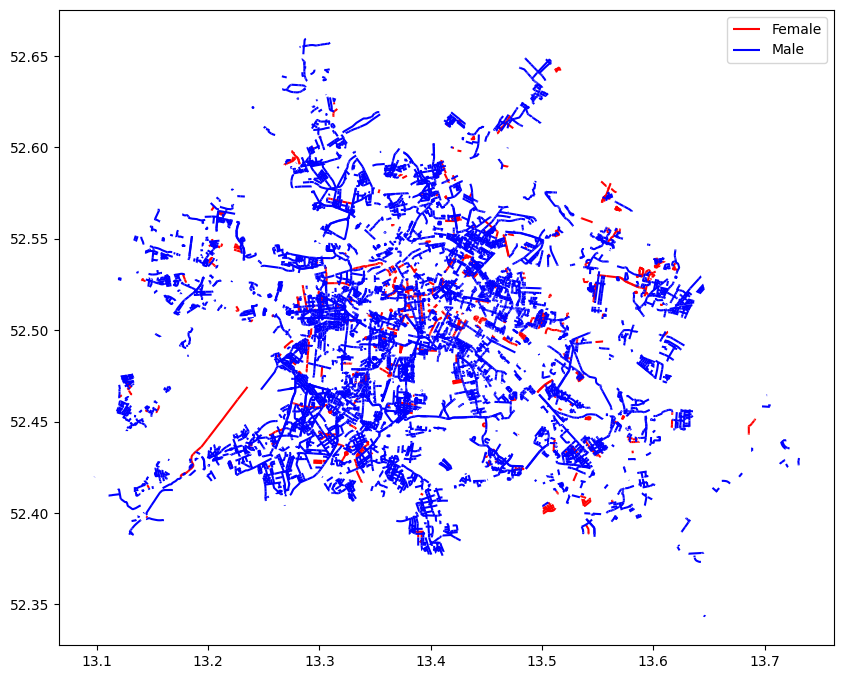

In [19]:
#plot female and male street names
fig, ax = plt.subplots(figsize=(10, 10))

gdf_streetNames_fm[gdf_streetNames_fm["gender"] == "F"].plot(ax=ax, color="red", label="Female") 
gdf_streetNames_fm[gdf_streetNames_fm["gender"] == "M"].plot(ax=ax, color="blue", label="Male")

plt.legend()
plt.show()

In [20]:
gdf_streetNames_fm["gender"].value_counts()

gender
M    17394
F     1726
Name: count, dtype: int64

In [21]:
"""
------------------------------------------------------------------------------
Functions: 
female street names
male street names
------------------------------------------------------------------------------
"""

def calculate_f_streets(admin_area, gdf_streetNames_fm):
    #find intersections between the street dataframe and admin areas
    intersections = gdf_streetNames_fm[gdf_streetNames_fm.intersects(admin_area.geometry)]
    
    #Count the unique female street names in the intersections
    unique_f_streets = intersections[intersections["gender"] == "F"]["name"].nunique()
    
    print(f"Admin Area: {admin_area['pgr_name']}, Unique_f_streets: {unique_f_streets}")
    
    return unique_f_streets


def calculate_m_streets(admin_area, gdf_streetNames_fm):
    #find intersections between the street dataframe and admin areas
    intersections = gdf_streetNames_fm[gdf_streetNames_fm.intersects(admin_area.geometry)]
    
    #Count the unique female street names in the intersections
    unique_m_streets = intersections[intersections["gender"] == "M"]["name"].nunique()
    
    print(f"Admin Area: {admin_area['pgr_name']}, Unique_m_streets: {unique_m_streets}")
    
    return unique_m_streets


In [22]:
#test one admin area
intersections = gdf_streetNames_fm[gdf_streetNames_fm.intersects(admin_areas.iloc[0].geometry)]
intersections[intersections["gender"] == "F"]["name"].nunique()

7

In [23]:
intersections[intersections["gender"] == "M"]["name"].nunique()

25

In [24]:
gdf_streetNames_fm.geometry.head()

0     LINESTRING (13.53136 52.49263, 13.53136 52.492...
6     LINESTRING (13.51476 52.45303, 13.51528 52.45267)
8     LINESTRING (13.26152 52.50771, 13.26165 52.507...
12    LINESTRING (13.40264 52.51893, 13.40197 52.51867)
15    LINESTRING (13.27354 52.4999, 13.27342 52.4999...
Name: geometry, dtype: geometry

In [25]:
#calculation of unique_f_streets and unique_m_streets for each administrative area
admin_areas["unique_f_streets"] = admin_areas.apply(
    lambda row: calculate_f_streets(row, gdf_streetNames_fm), axis=1
)

admin_areas["unique_m_streets"] = admin_areas.apply(
    lambda row: calculate_m_streets(row, gdf_streetNames_fm), axis=1
)

#subset
streetNames = admin_areas[["pgr_id", "pgr_name", "unique_f_streets", "unique_m_streets"]]
streetNames.head()

Admin Area: Südlicher Prenzlauer Berg, Unique_f_streets: 7
Admin Area: Kreuzberg Süd, Unique_f_streets: 4
Admin Area: Marienfelde / Lichtenrade, Unique_f_streets: 5
Admin Area: Wilhelmstadt / Staaken, Unique_f_streets: 3
Admin Area: Nördliches Weißensee, Unique_f_streets: 4
Admin Area: Tempelhof, Unique_f_streets: 7
Admin Area: Lichtenberg Nord, Unique_f_streets: 3
Admin Area: Lichtenberg Mitte, Unique_f_streets: 9
Admin Area: Hellersdorf, Unique_f_streets: 16
Admin Area: Buch, Unique_f_streets: 3
Admin Area: Hohenschönhausen Nord, Unique_f_streets: 5
Admin Area: Kaulsdorf/Mahlsdorf, Unique_f_streets: 3
Admin Area: Treptow-Köpenick 1, Unique_f_streets: 3
Admin Area: Tegel, Unique_f_streets: 5
Admin Area: Mariendorf, Unique_f_streets: 0
Admin Area: Friedrichshain Ost, Unique_f_streets: 7
Admin Area: Nördlicher Prenzlauer Berg, Unique_f_streets: 10
Admin Area: Charlottenburg Nord, Unique_f_streets: 4
Admin Area: Lankwitz/Lichterfelde Ost, Unique_f_streets: 13
Admin Area: Schöneberg Nord,

,pgr_id,pgr_name,unique_f_streets,unique_m_streets
0,0370,Südlicher Prenzlauer Berg,7,25
1,0220,Kreuzberg Süd,4,68
2,0760,Marienfelde / Lichtenrade,5,132
3,0520,Wilhelmstadt / Staaken,3,88
4,0330,Nördliches Weißensee,4,23


In [26]:
#add total street count and female streets in percent
streetNames["unique_streets_count"] = streetNames["unique_f_streets"] + streetNames["unique_m_streets"]
streetNames["fStreets_percent"] = (streetNames["unique_f_streets"] / streetNames["unique_streets_count"]) *100

#int
streetNames["fStreets_percent"] = streetNames["fStreets_percent"].astype(int)

/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_53766/884361076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  streetNames["unique_streets_count"] = streetNames["unique_f_streets"] + streetNames["unique_m_streets"]
/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_53766/884361076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  streetNames["fStreets_percent"] = (streetNames["unique_f_streets"] / streetNames["unique_streets_count"]) *100
/var/folders/_f/022l68353h9c2pr_3t55ns1m000

In [27]:
#sort descending
streetNames.sort_values(by="unique_f_streets", ascending=False, inplace =True)
streetNames

/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_53766/2471437236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  streetNames.sort_values(by="unique_f_streets", ascending=False, inplace =True)


,pgr_id,pgr_name,unique_f_streets,unique_m_streets,unique_streets_count,fStreets_percent
24,0110,Zentrum,49,166,215,22
31,0120,Moabit,22,63,85,25
45,0630,Zehlendorf Süd/Lichterfelde West,17,133,150,11
51,0430,Charlottenburg Zentrum,16,124,140,11
8,1020,Hellersdorf,16,30,46,34
30,0840,Buckow Nord/Rudow,14,29,43,32
33,1150,Lichtenberg Süd,14,39,53,26
18,0620,Lankwitz/Lichterfelde Ost,13,96,109,11
46,0340,Südliches Pankow,12,80,92,13
37,0510,Spandau Mitte / Nord,11,75,86,12


In [28]:
#min max
streetNames["fStreets_percent"].min()

np.int64(0)

In [29]:
streetNames["fStreets_percent"].max()

np.int64(34)

In [30]:
#csv
streetNames.to_csv("../data/csv/femaleStreetNames.csv", index = False)

In [31]:
"""
------------------------------------------------------------------------------
MAPS

GeoJSON and SVG files for the intersections per admin area
------------------------------------------------------------------------------
"""

'\n------------------------------------------------------------------------------\nMAPS\n\nGeoJSON and SVG files for the intersections per admin area\n------------------------------------------------------------------------------\n'

In [32]:
gdf_streetNames_fm.head()

,name,wikidata,gender,source,details,geometry
0,Ursula-Goetze-Straße,None,F,wikidata,"{ ""wikidata"": ""Q108809"", ""person"": true, ""gend...","LINESTRING (13.53136 52.49263, 13.53136 52.492..."
6,Michael-Brückner-Straße,None,M,wikidata,"{ ""wikidata"": ""Q1927076"", ""person"": true, ""gen...","LINESTRING (13.51476 52.45303, 13.51528 52.45267)"
8,Jafféstraße,Q22287975,M,wikidata,"{ ""wikidata"": ""Q817940"", ""person"": true, ""gend...","LINESTRING (13.26152 52.50771, 13.26165 52.507..."
12,Liebknechtbrücke,None,M,wikidata,"{ ""wikidata"": ""Q75886"", ""person"": true, ""gende...","LINESTRING (13.40264 52.51893, 13.40197 52.51867)"
15,Alte Jafféstraße,None,M,wikidata,"{ ""wikidata"": ""Q817940"", ""person"": true, ""gend...","LINESTRING (13.27354 52.4999, 13.27342 52.4999..."


In [33]:
"""
------------------------------------------------------------------------------
Function
- female street name per admin area, svg and geojson
------------------------------------------------------------------------------
"""


def create_fStreetsGeom(admin_area, gdf_streetNames_fm):

    admin_geometry = admin_area.geometry
    Prognoseraum = admin_area.get("pgr_name").replace(" ", "_").replace("/", "_").replace(";", "_")

    #find intersections between the female street names GeoDataFrame and the admin area geometry
    gdf_fStreets = gdf_streetNames_fm[gdf_streetNames_fm["gender"] == "F"]
    intersections_fStreets= gdf_fStreets[gdf_fStreets.intersects(admin_area.geometry)]

    if intersections_fStreets.empty:
        print(f"No female street names in {Prognoseraum}.")
        return

    #Geo Data Frame of the intersections
    if not intersections_fStreets.empty:
        gdf_intersections_fStreets = gpd.GeoDataFrame(geometry= intersections_fStreets.geometry, crs= gdf_streetNames_fm.crs)
        #save as geojson
        gdf_intersections_fStreets.to_file(f"../maps/prognoseraum/{Prognoseraum}/{Prognoseraum}_strassen.geojson", driver="GeoJSON")

    #Geo Data Frame for the admin area
    gdf_admin = gpd.GeoDataFrame({"geometry": [admin_geometry]}, crs=gdf_streetNames_fm.crs)

    #plot admin area
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf_admin.plot(ax=ax, color="lightgrey")

    #plot cannabis free area within the admin areas
    if not intersections_fStreets.empty:
        gdf_intersections_fStreets.plot(ax=ax, color="red", alpha=0.7, edgecolor="black", linewidth=0.5)

        #add text
        centroid = admin_geometry.centroid
        ax.text(centroid.x, centroid.y, Prognoseraum, fontsize=12, ha="center", va="center")

    #save as svg
    #fig.savefig(f"../maps/svg/{Prognoseraum}_strassen.svg", format="svg")

    #plt.show()
    #plt.close(fig)

No female street names in Mariendorf.


/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_53766/3386480873.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 10))


No female street names in Märkisches_Viertel.


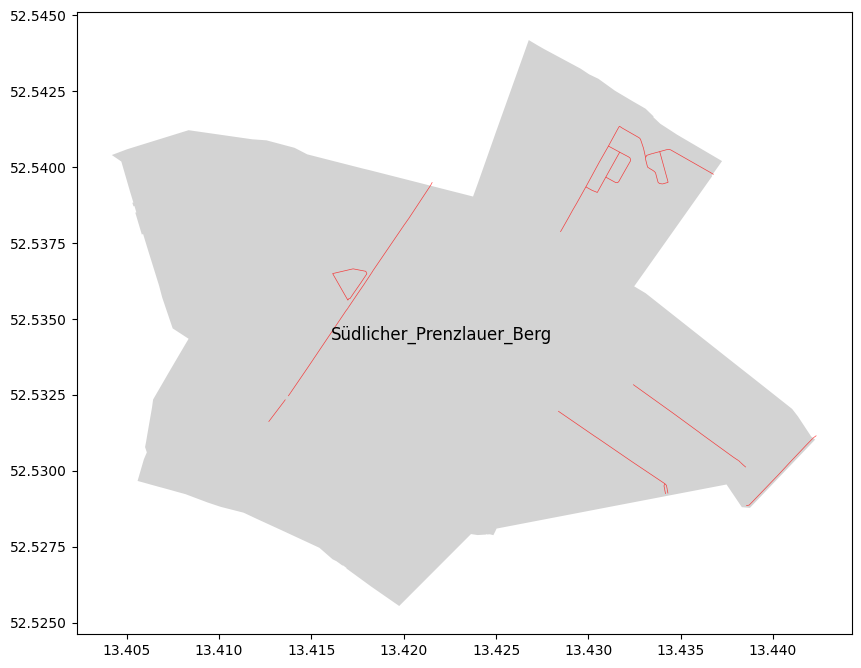

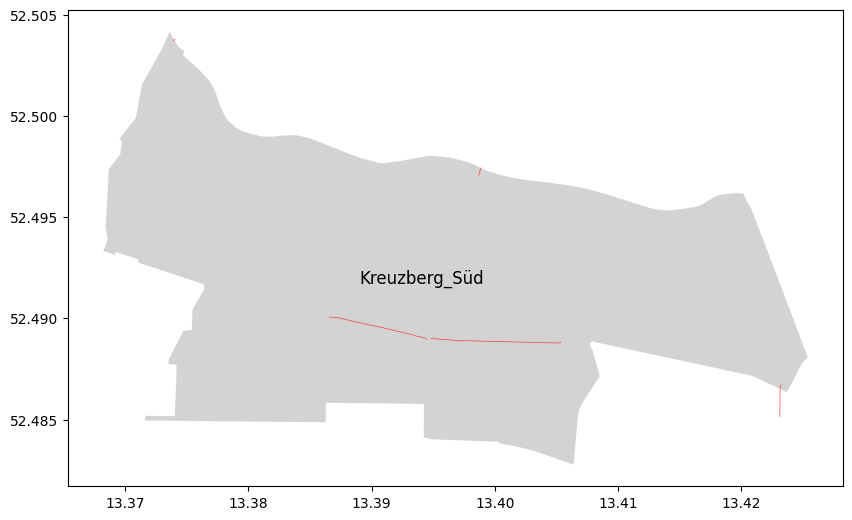

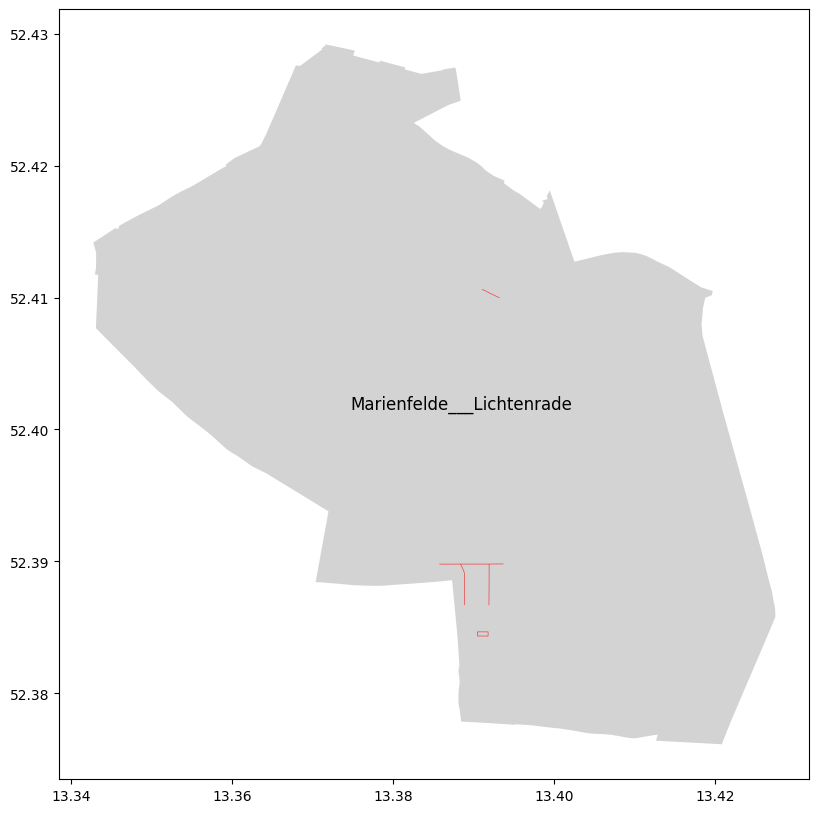

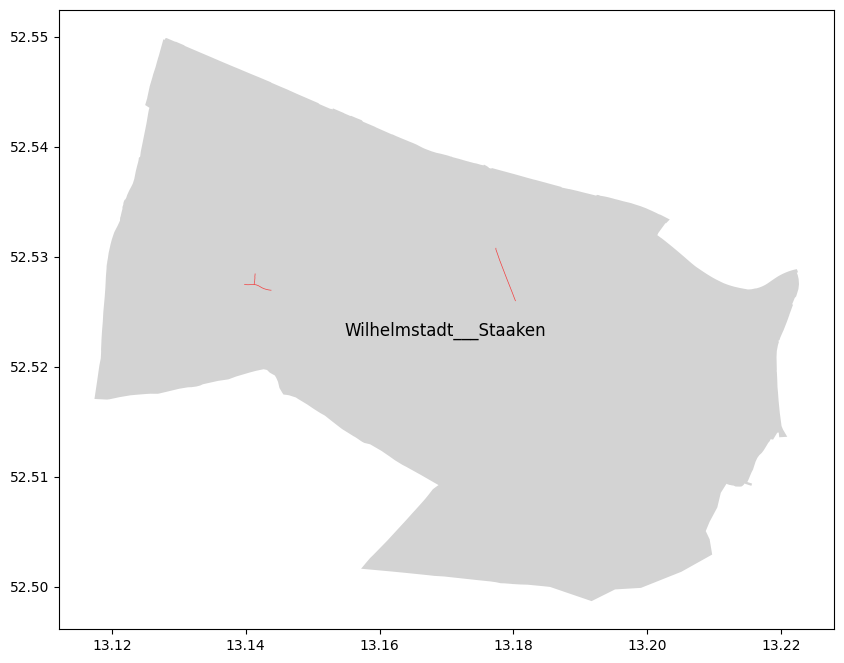

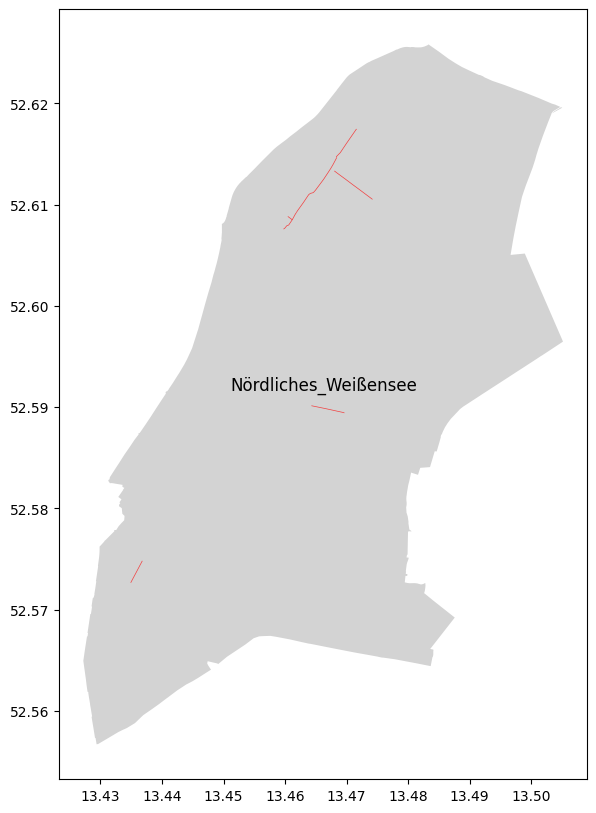

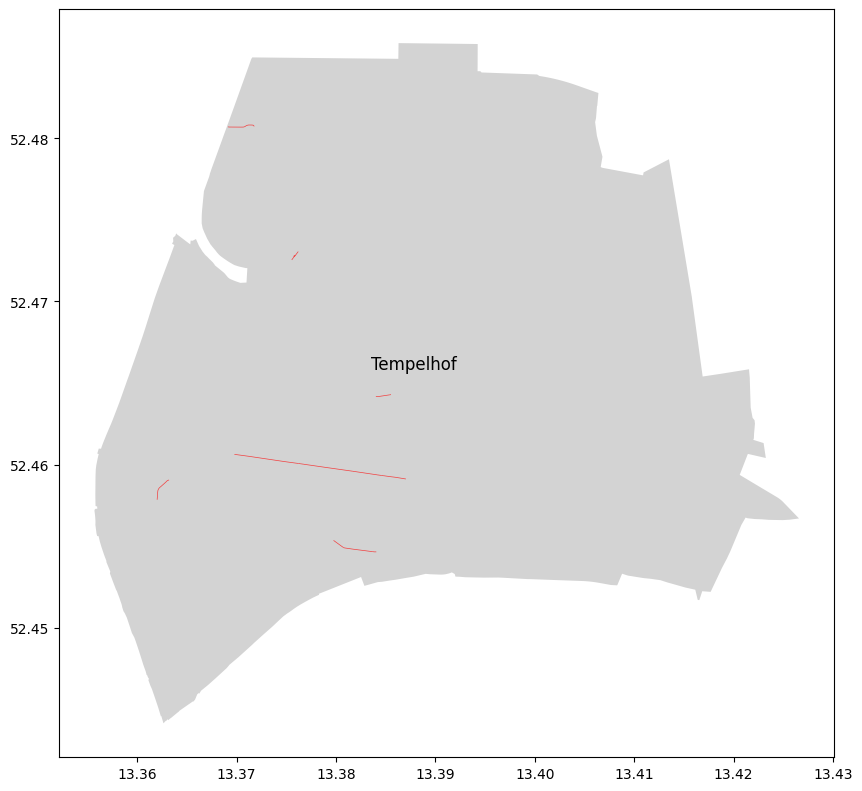

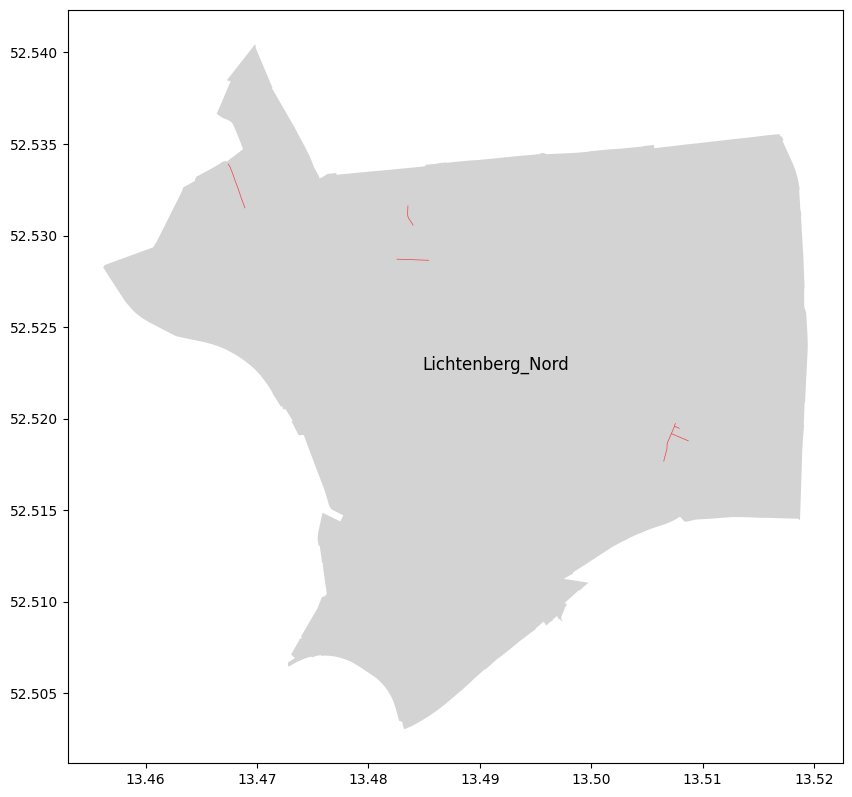

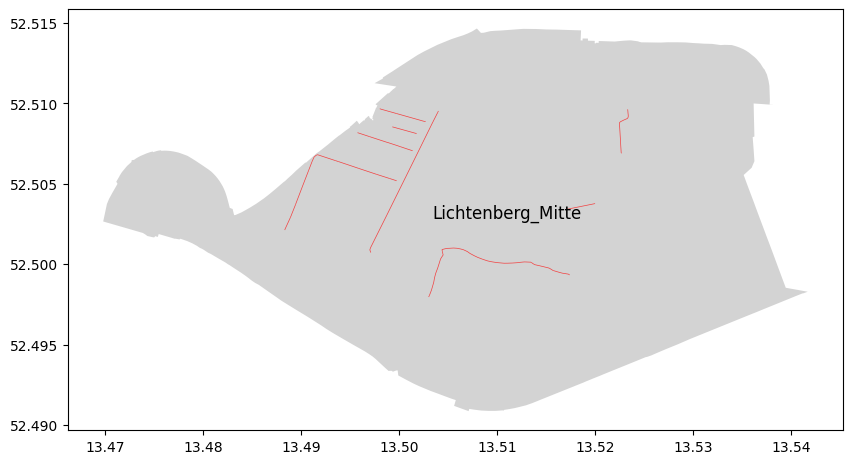

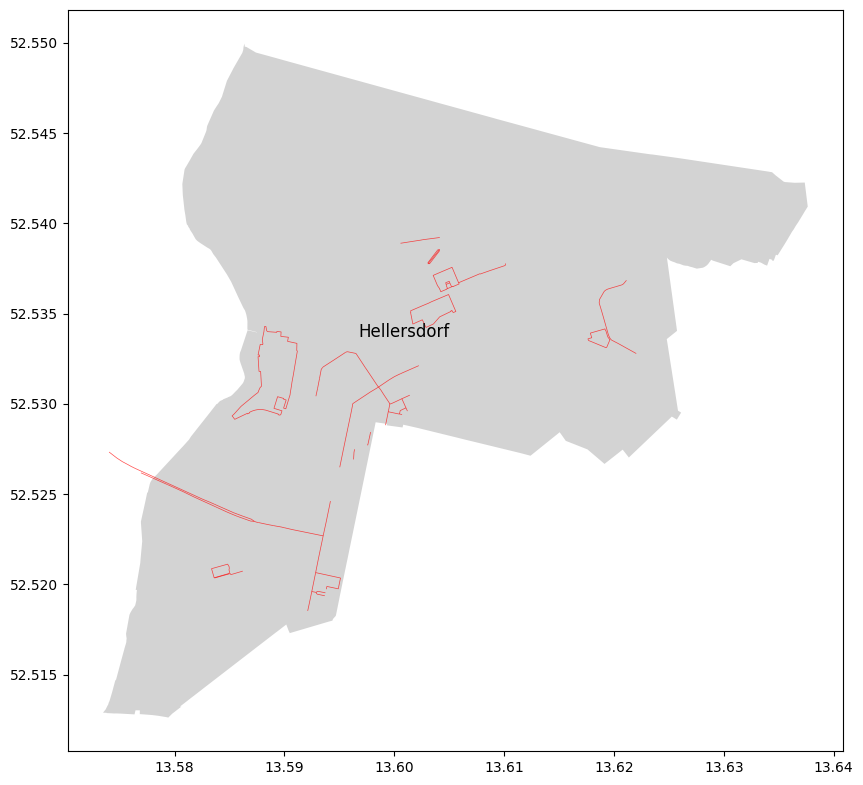

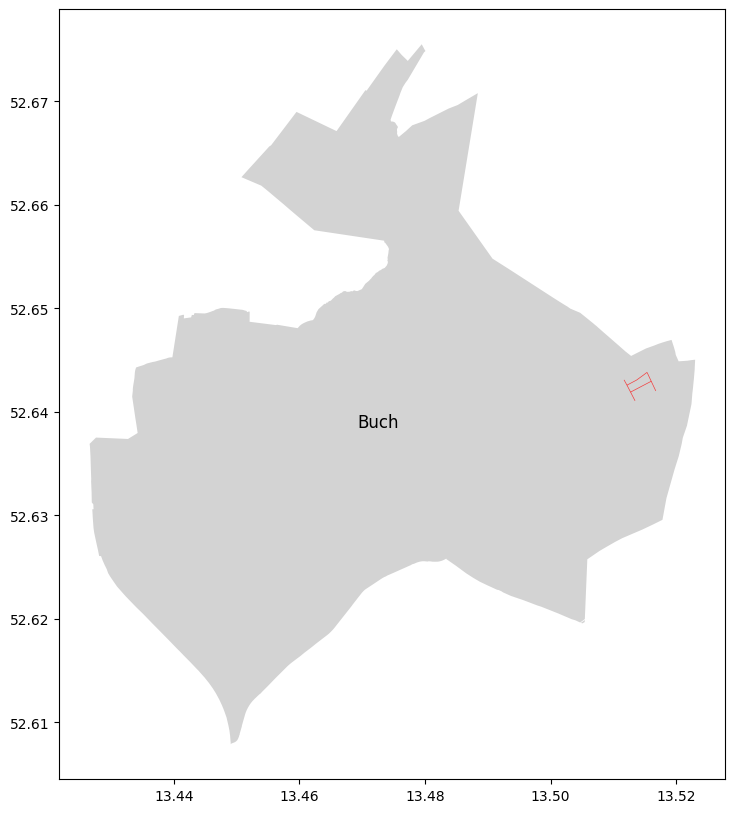

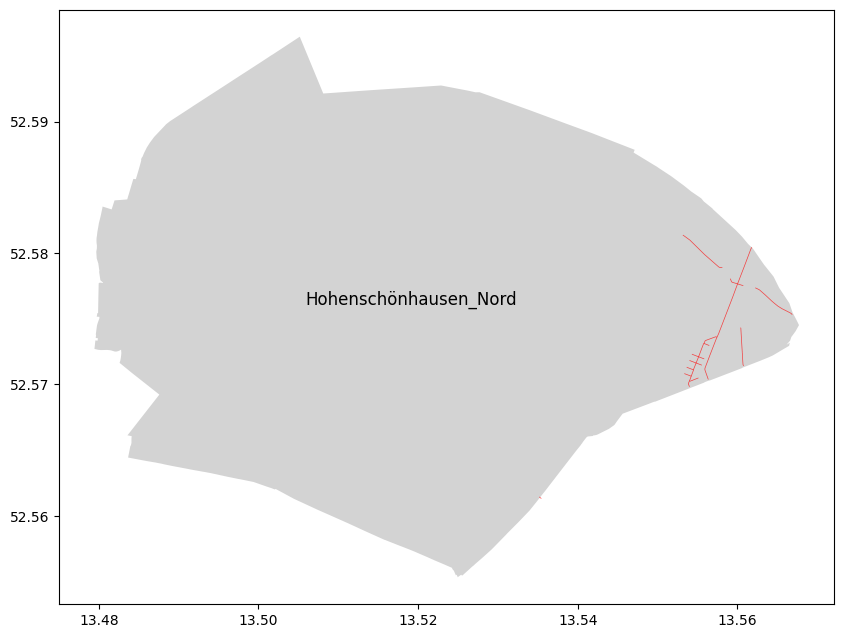

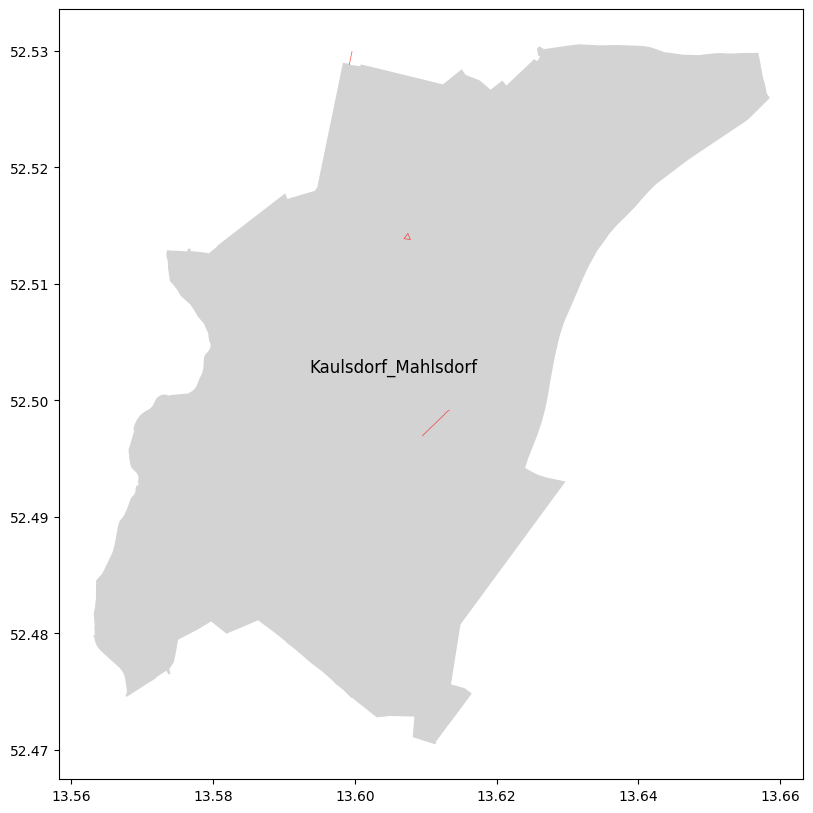

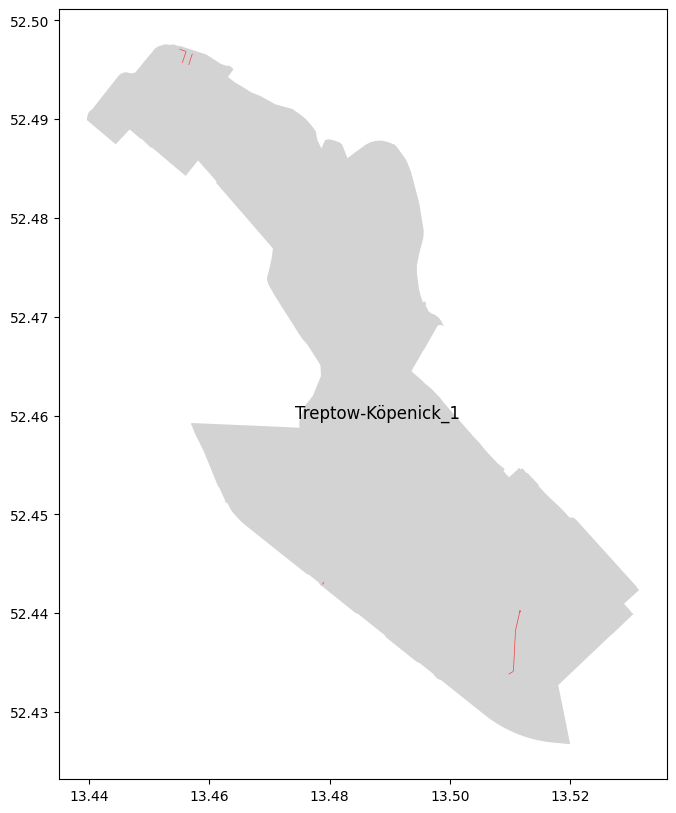

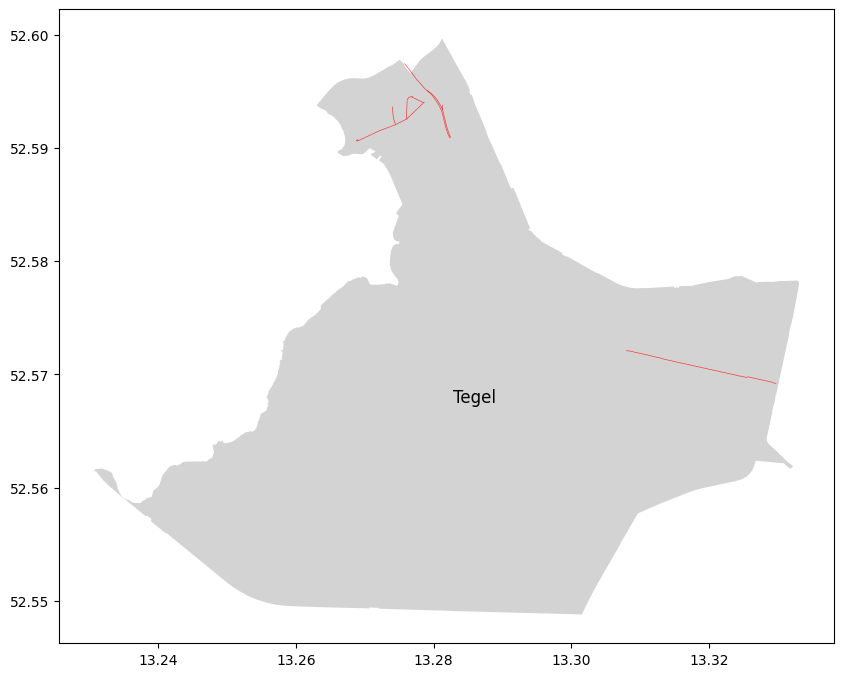

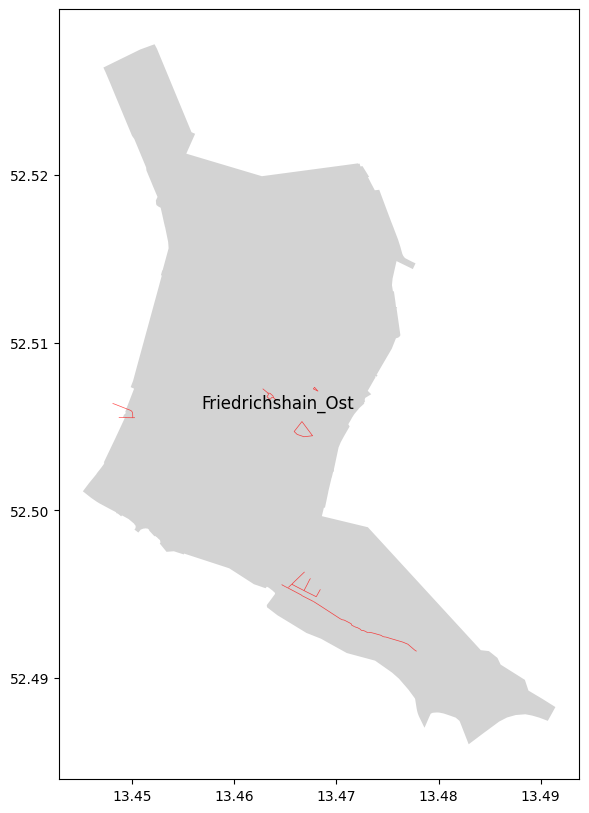

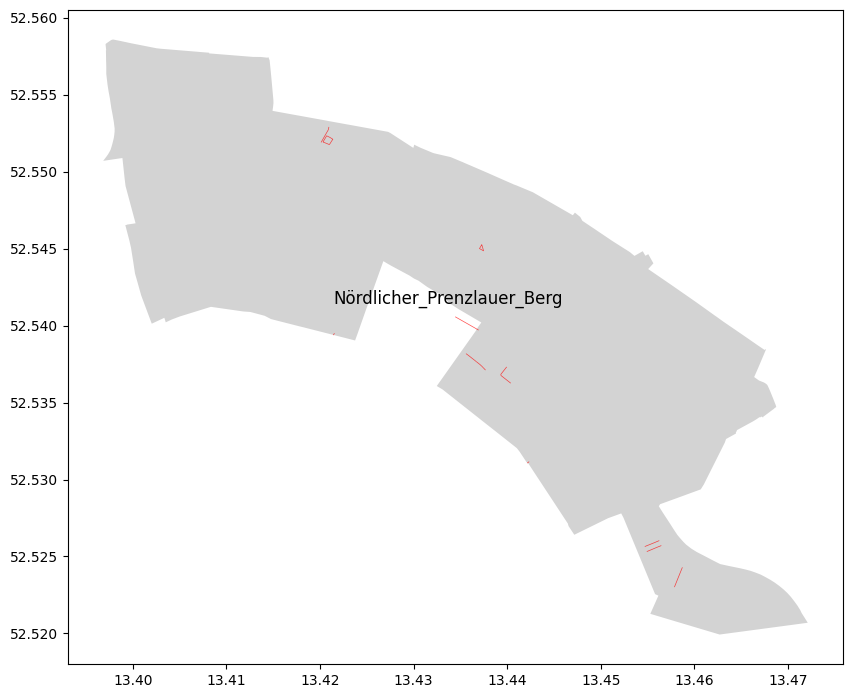

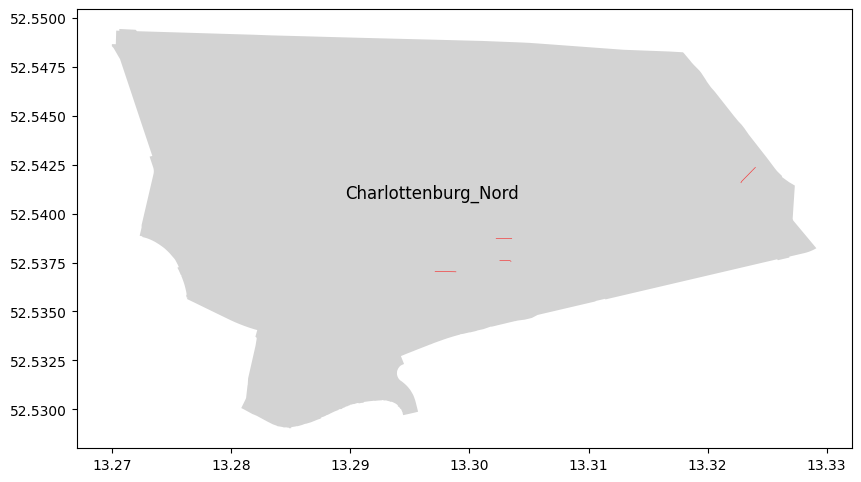

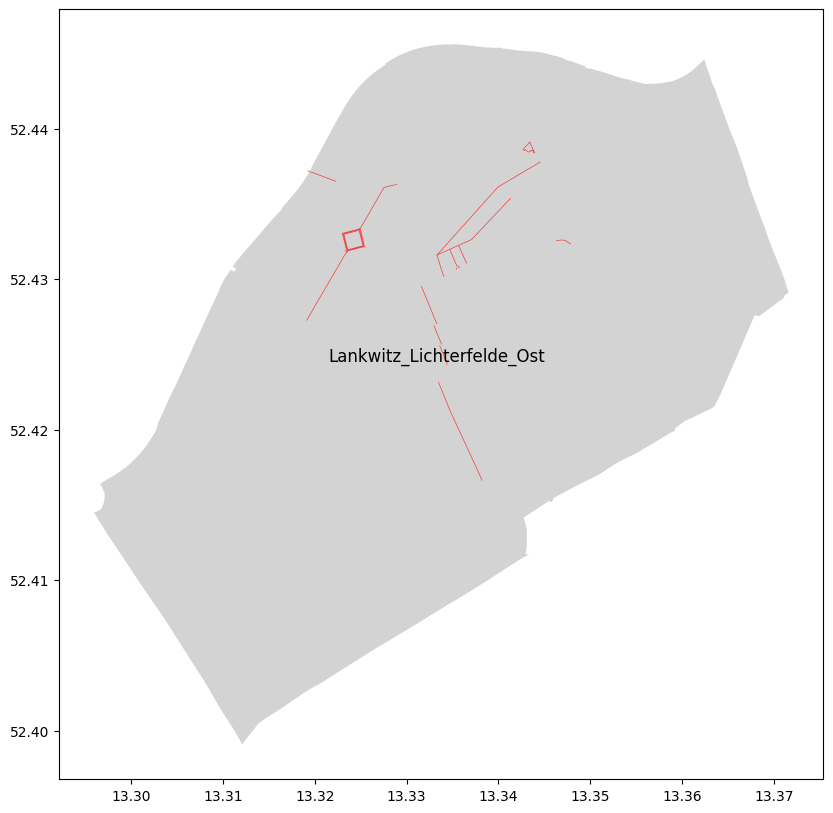

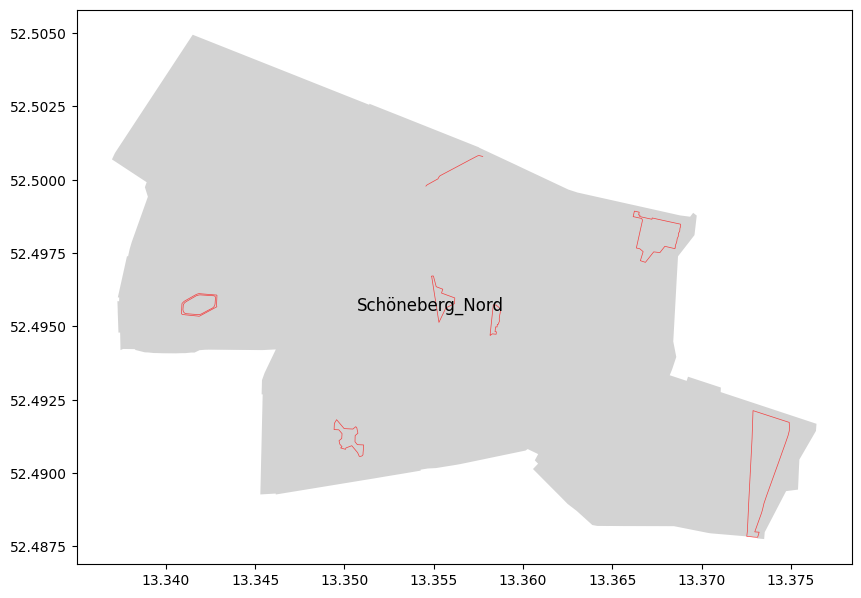

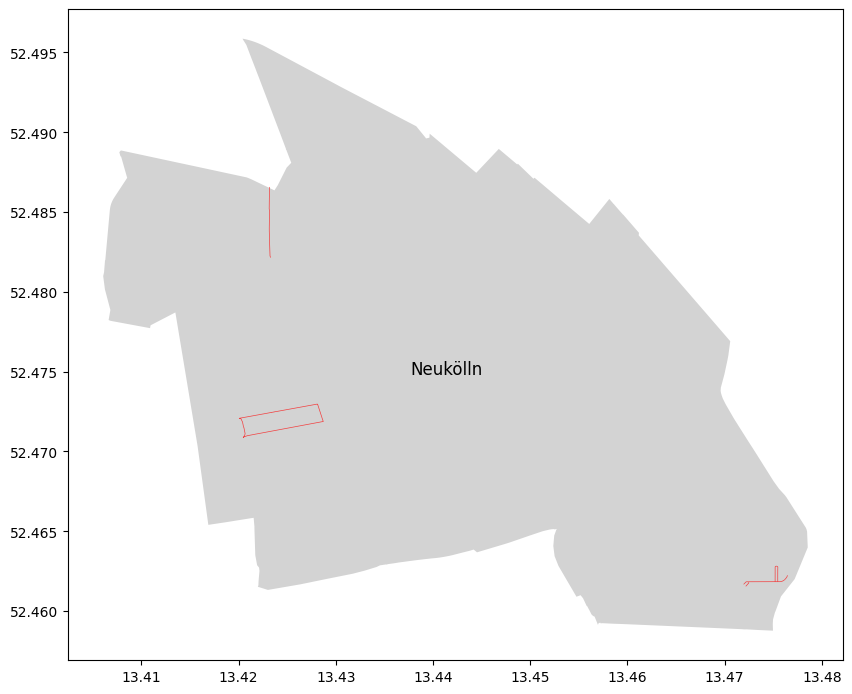

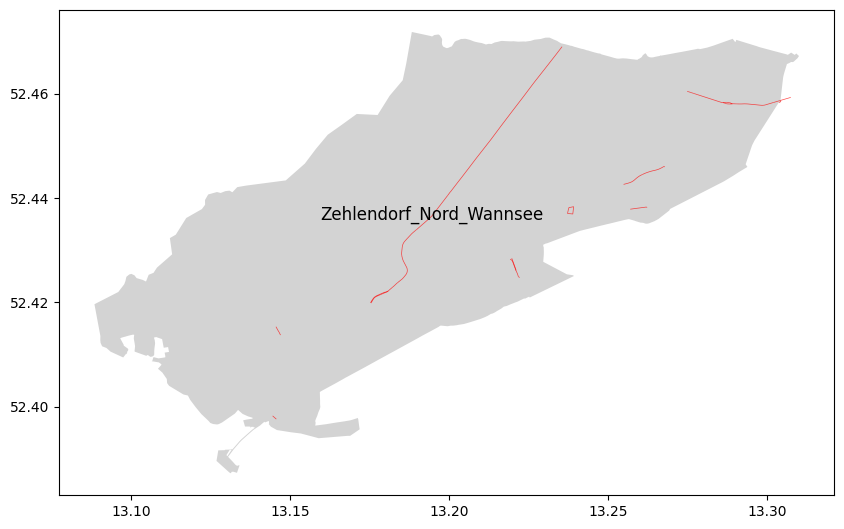

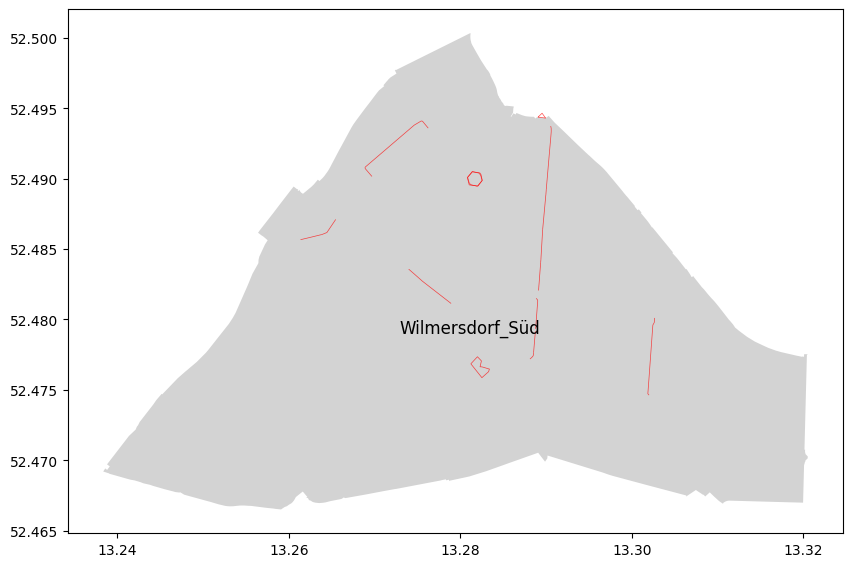

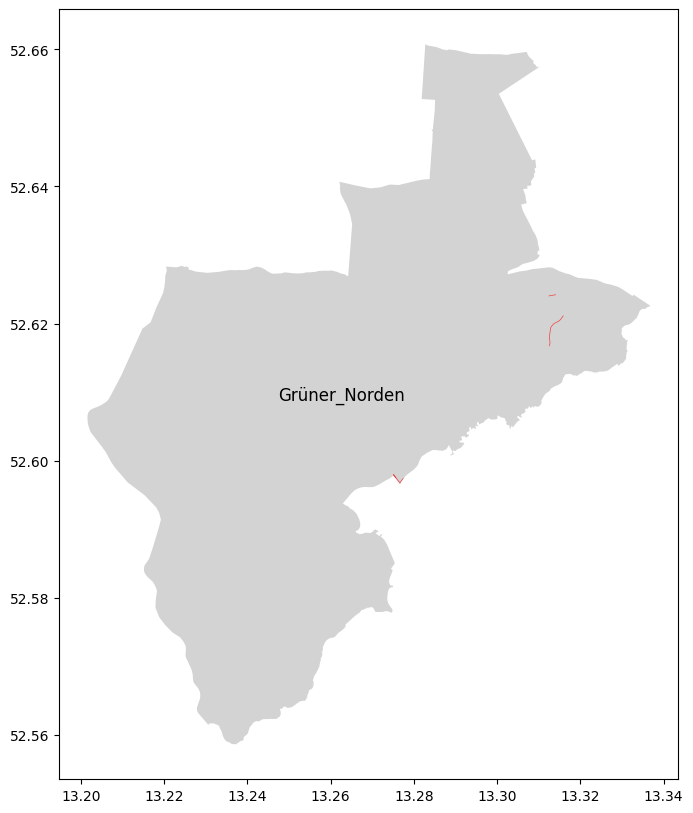

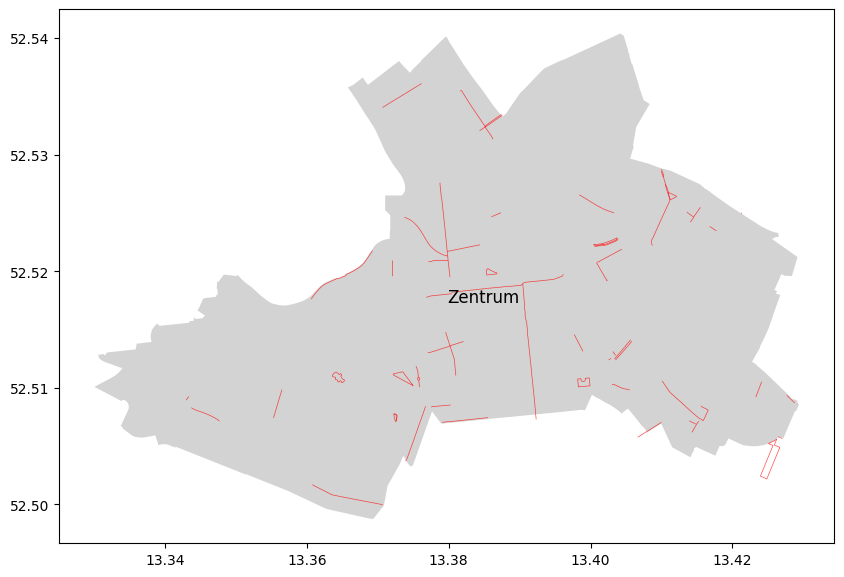

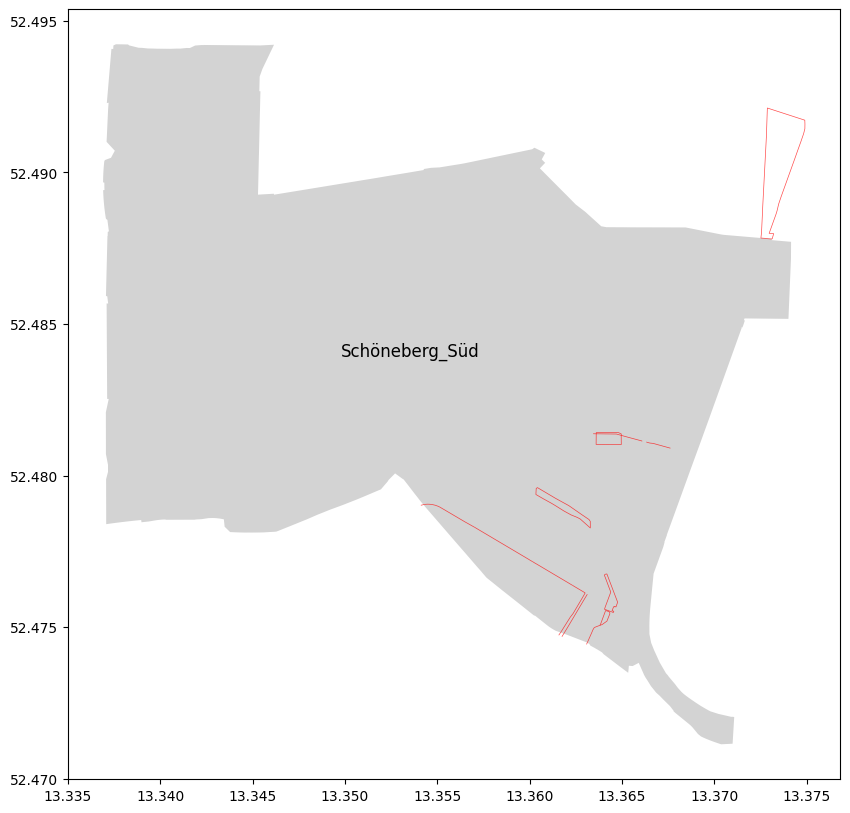

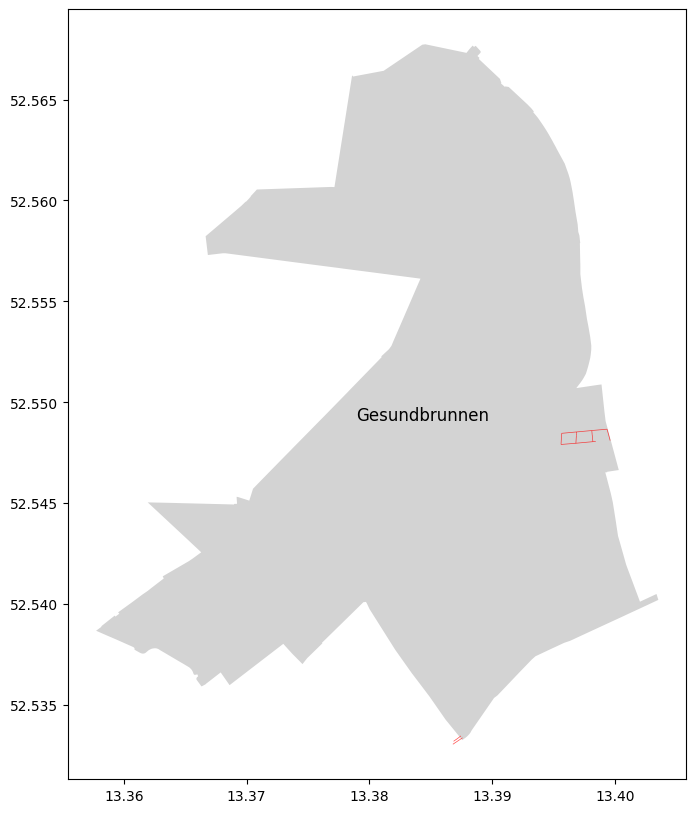

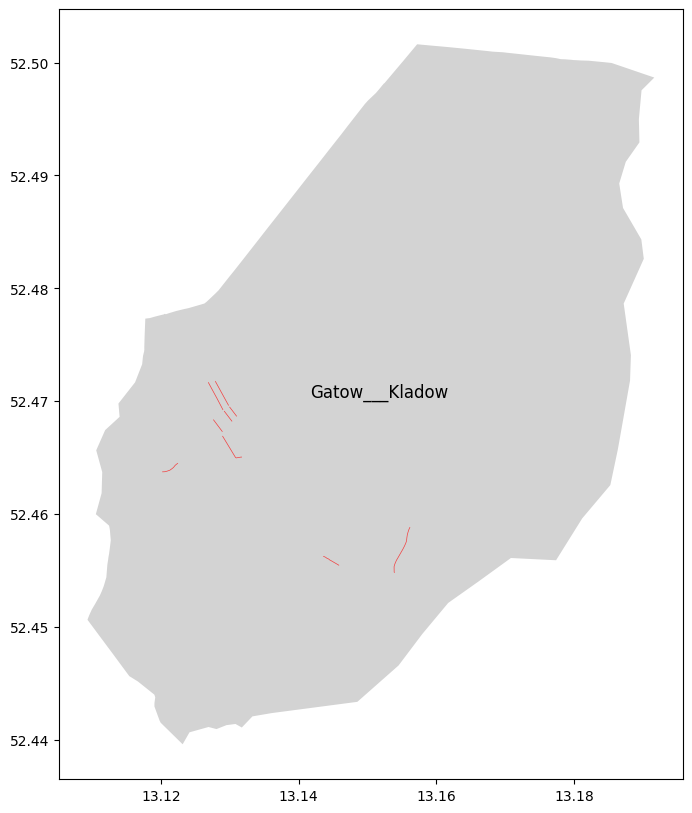

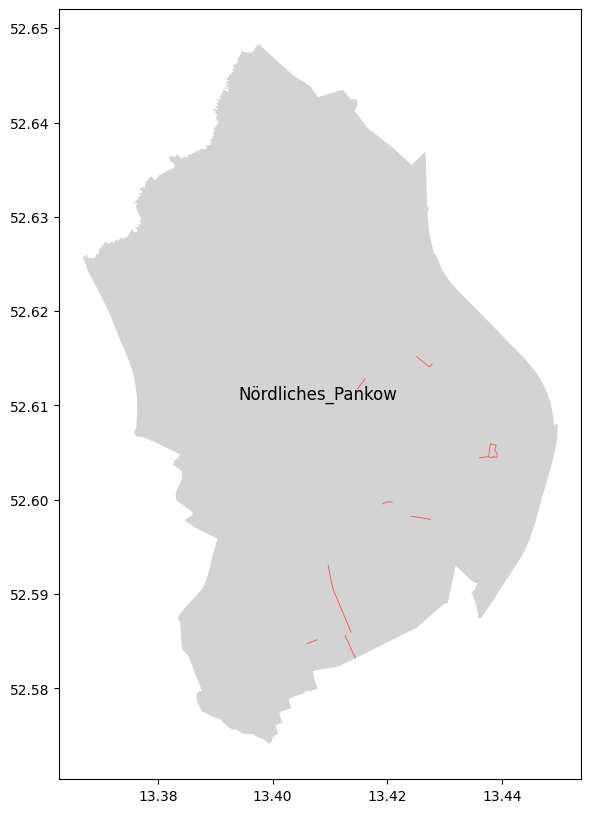

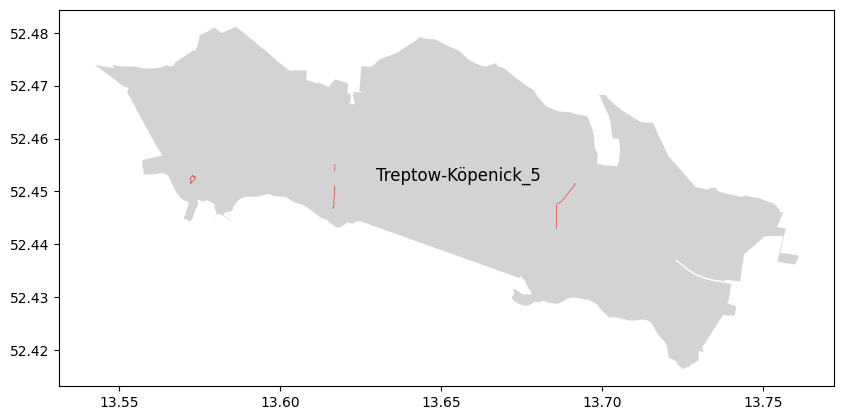

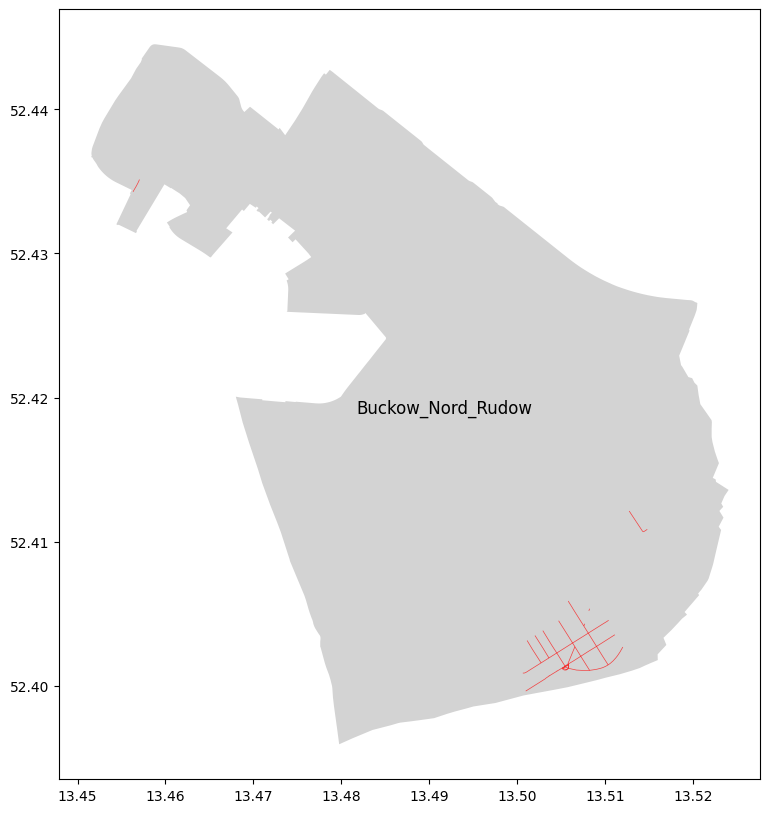

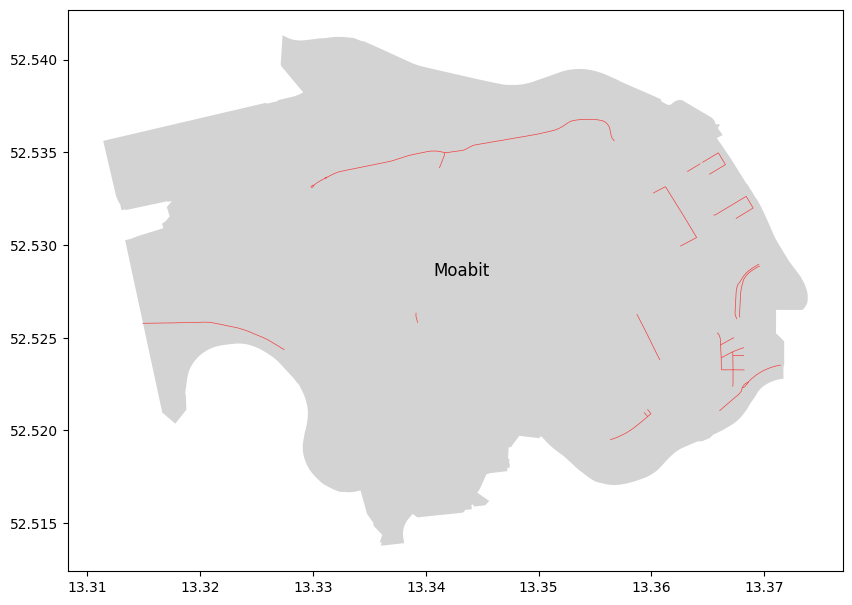

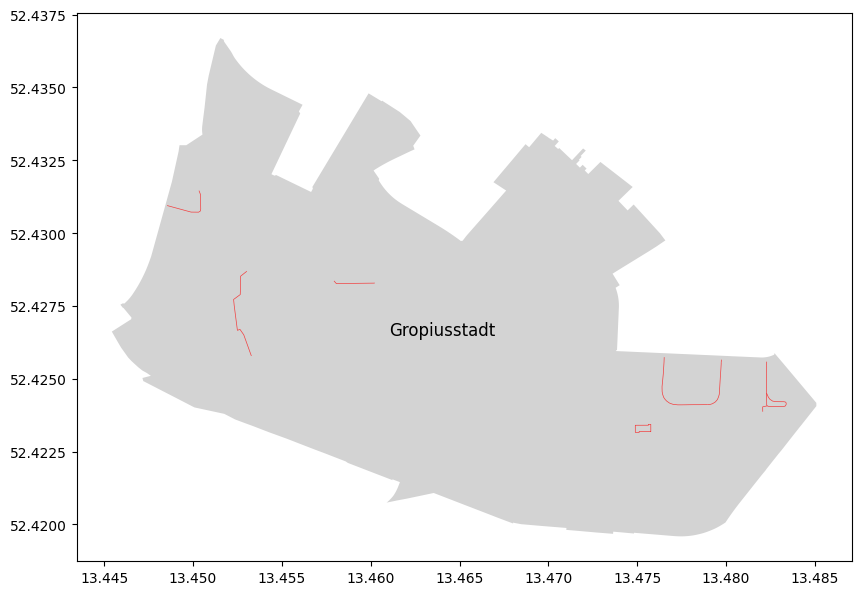

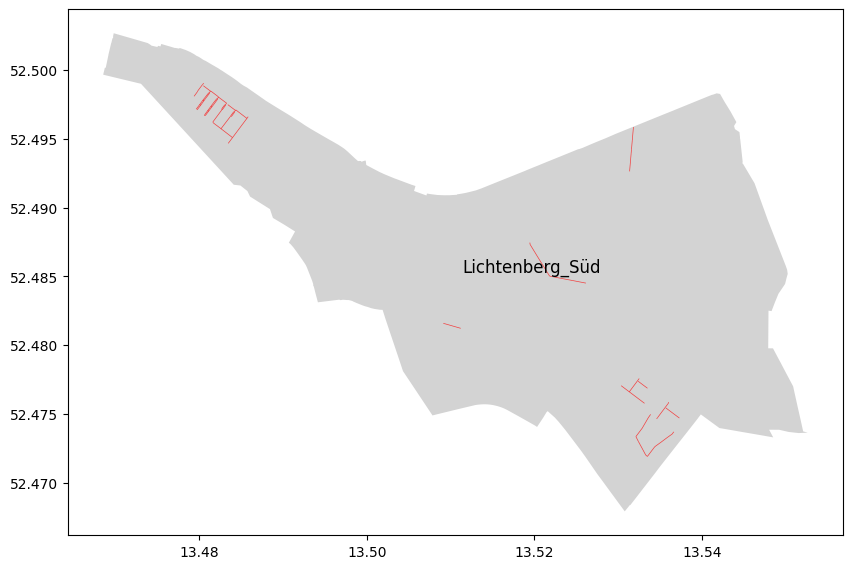

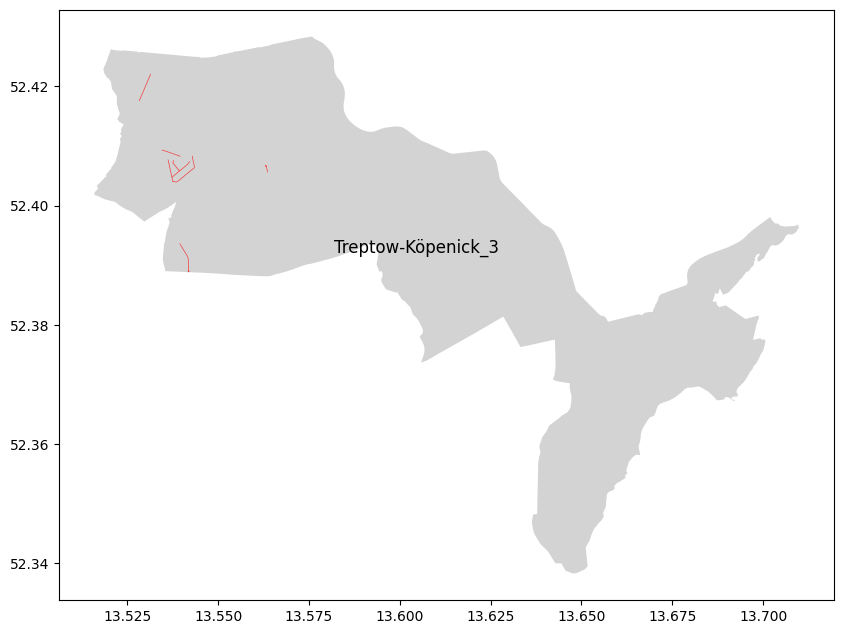

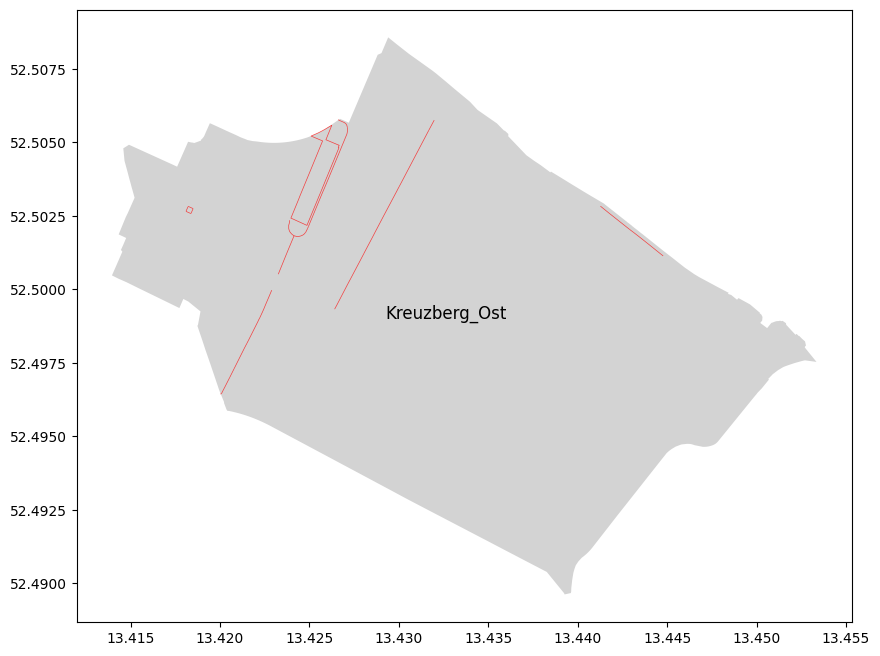

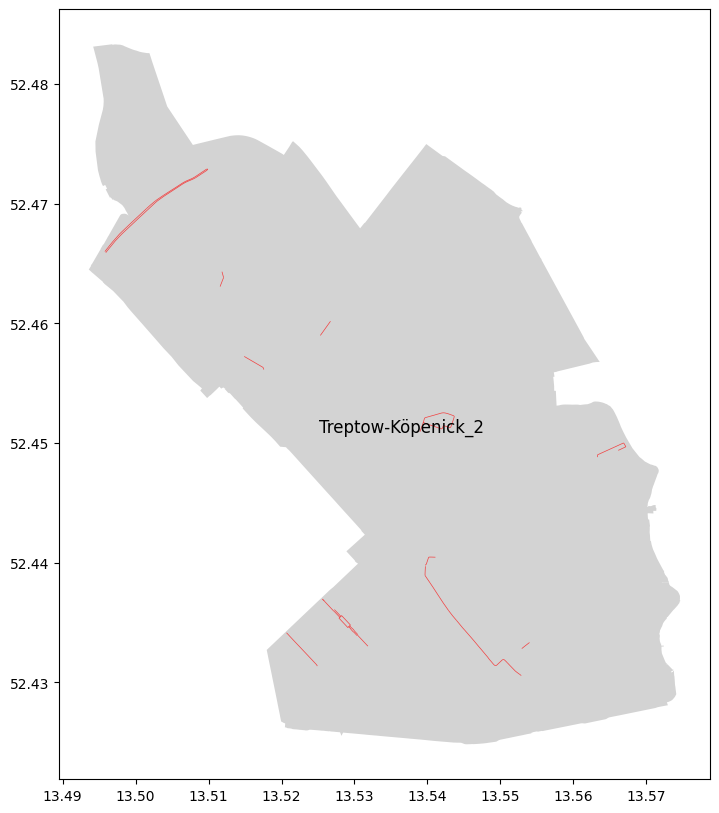

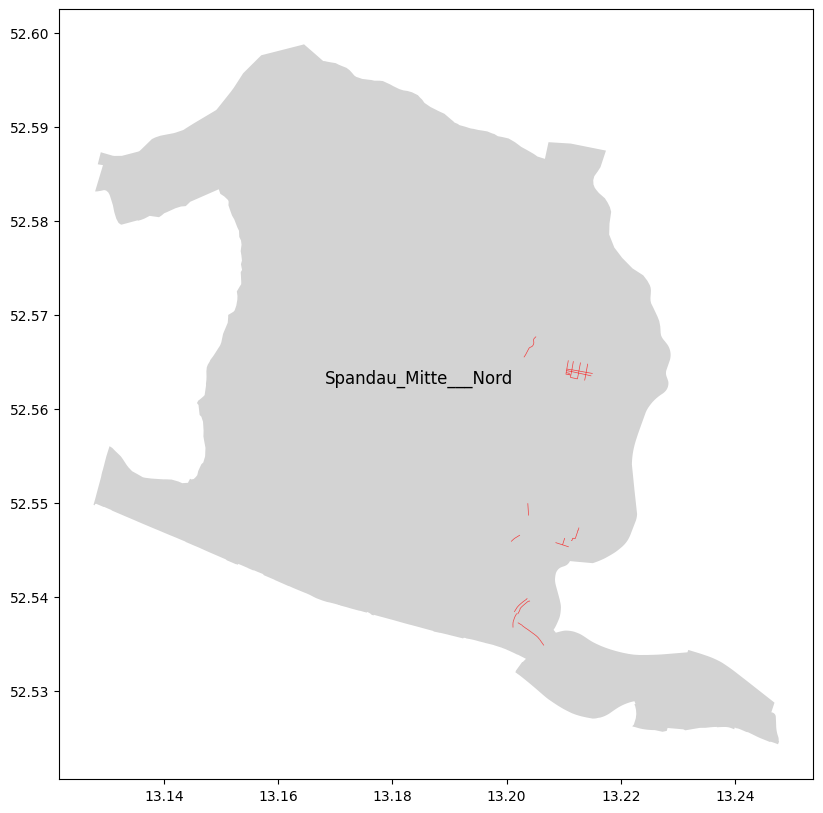

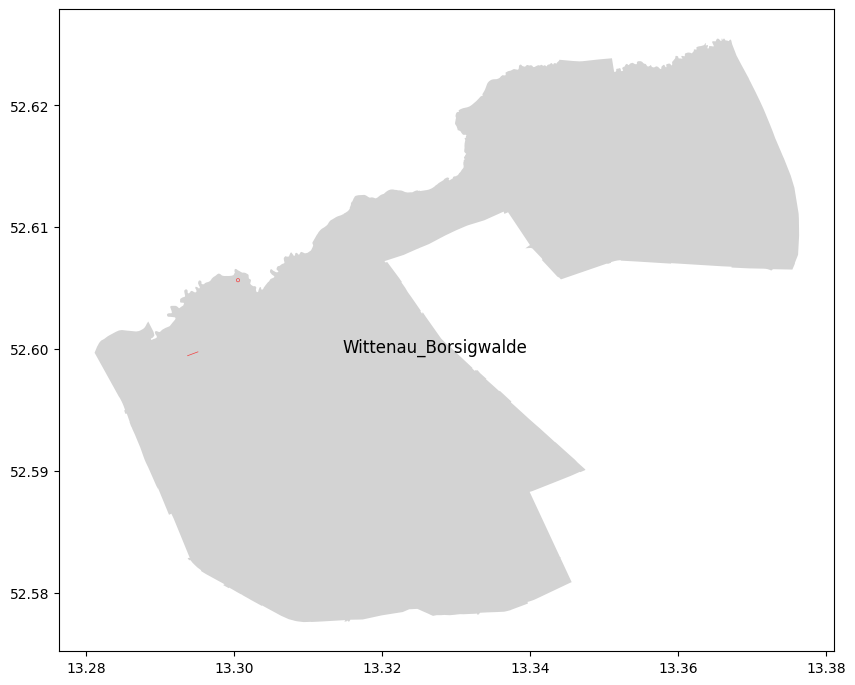

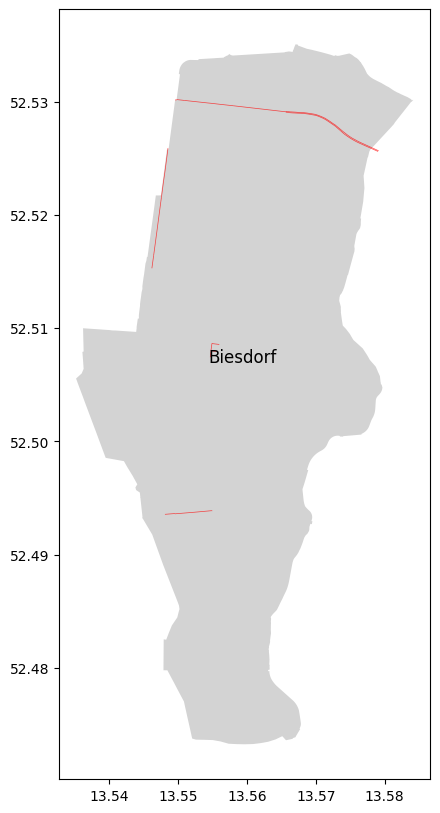

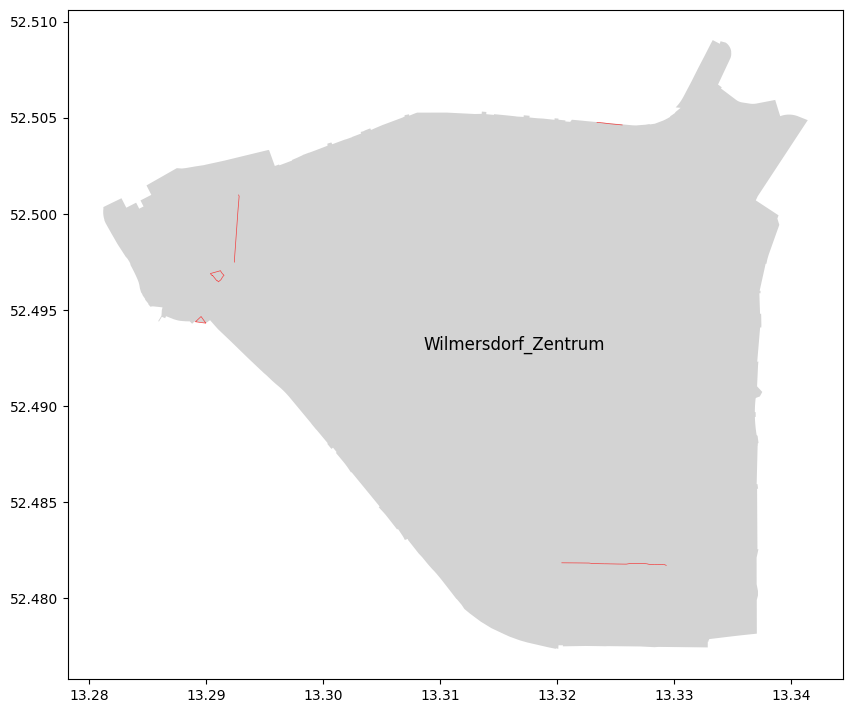

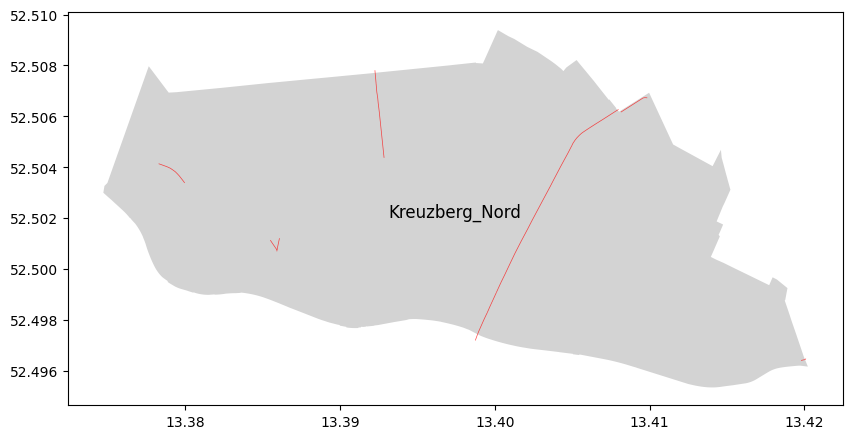

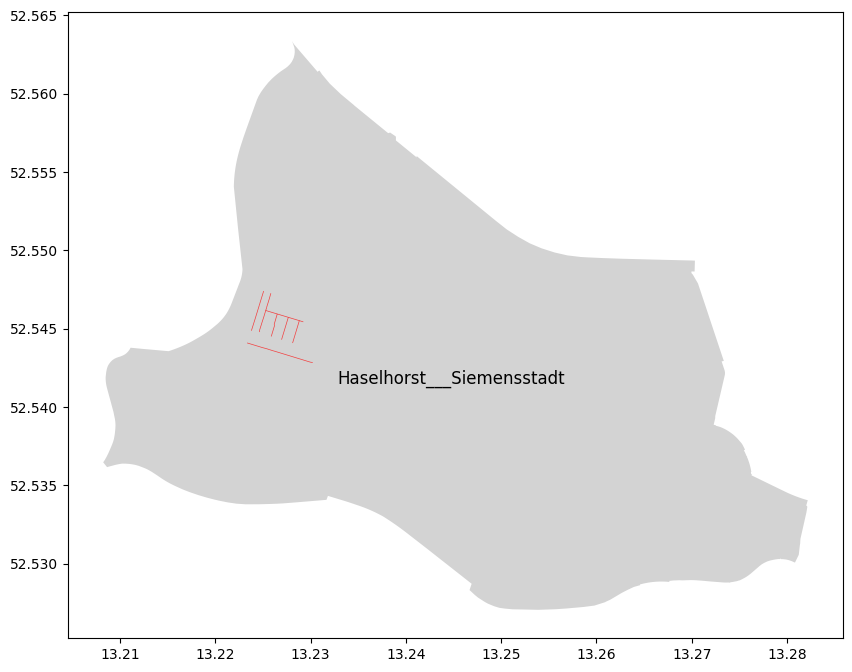

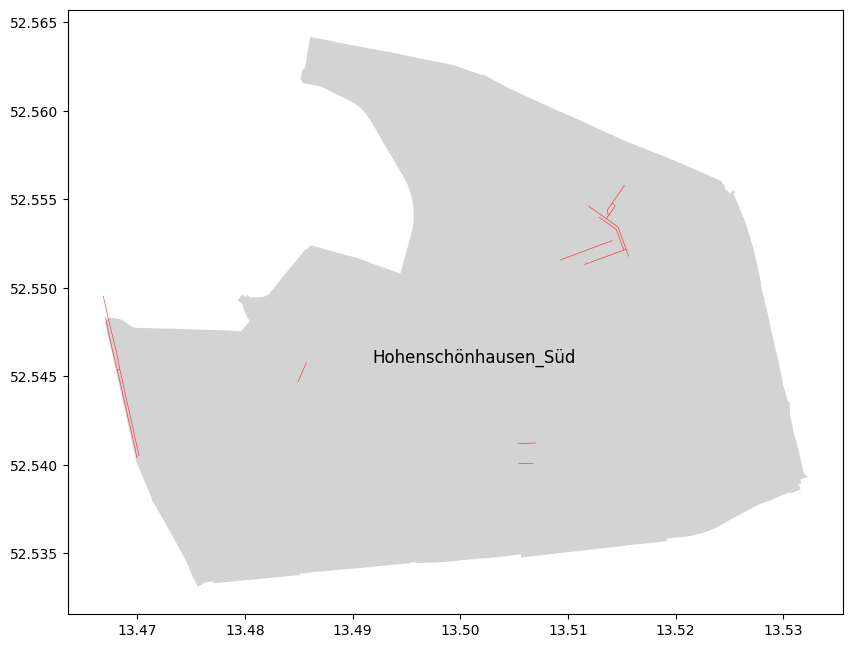

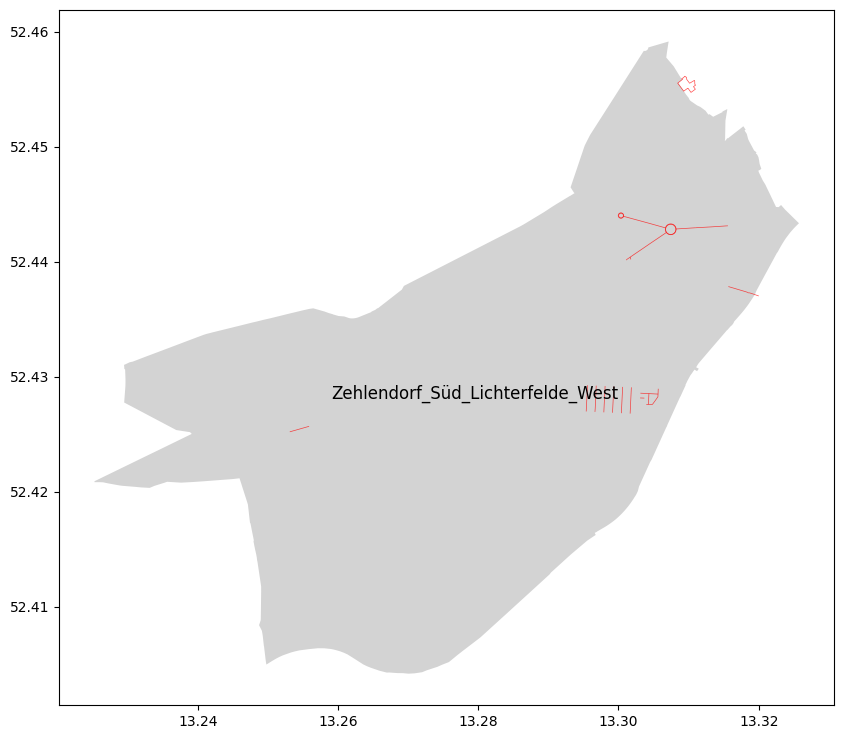

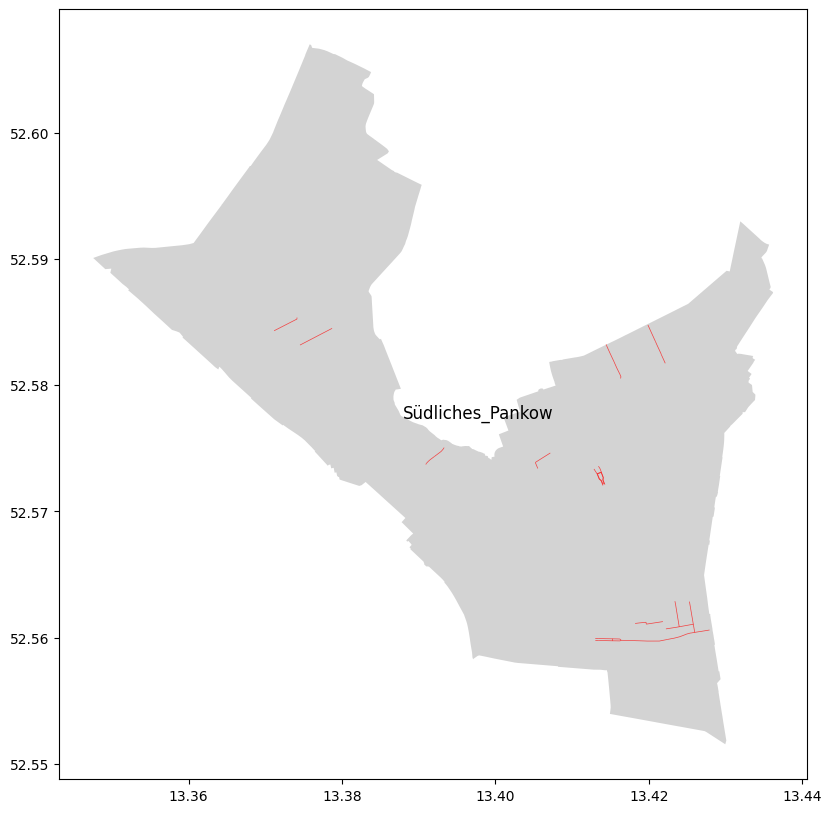

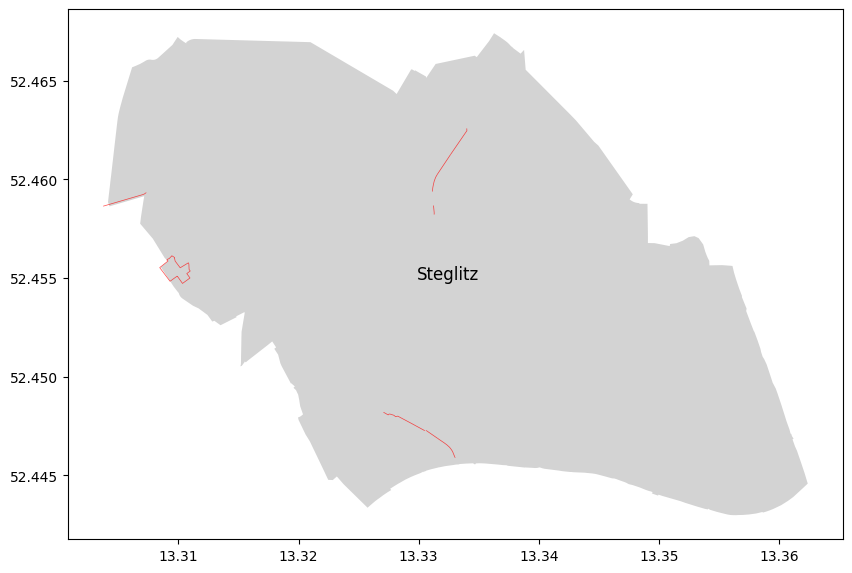

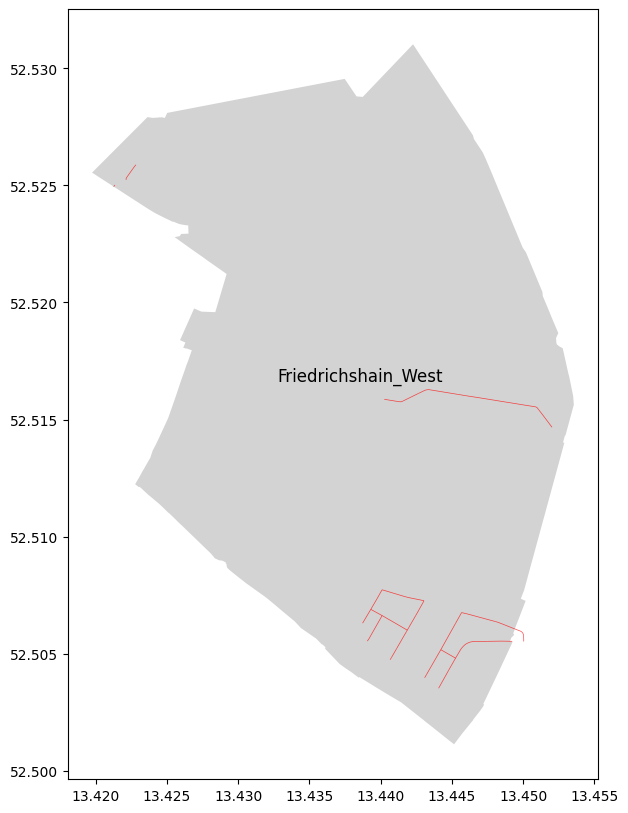

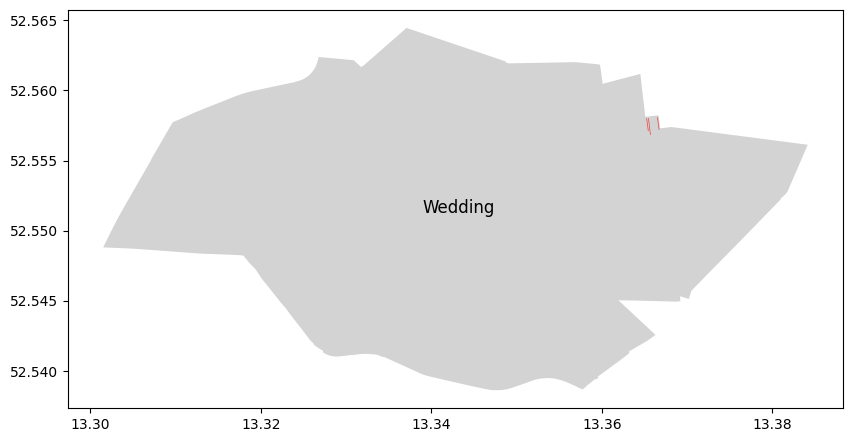

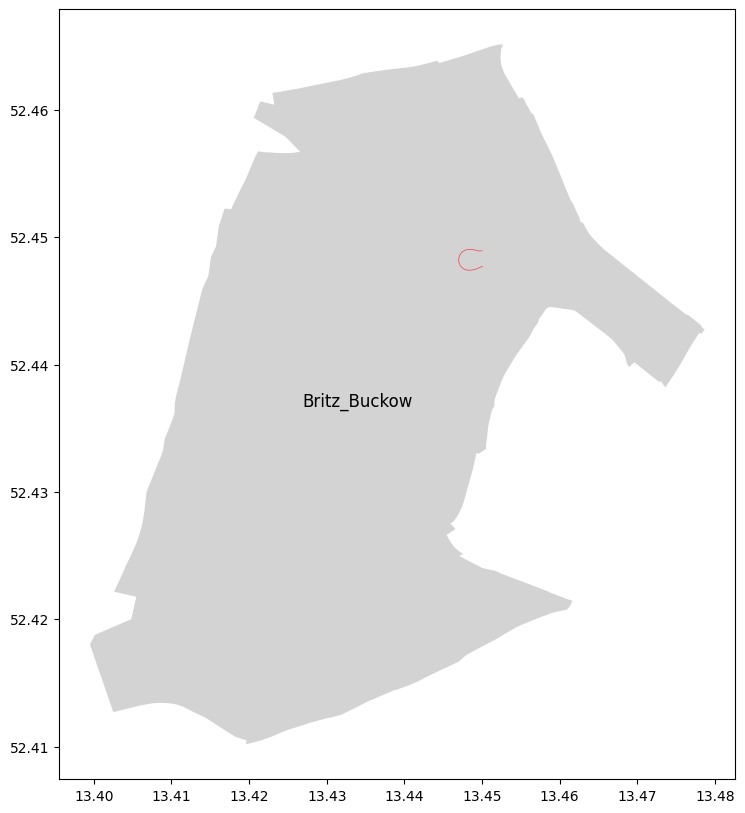

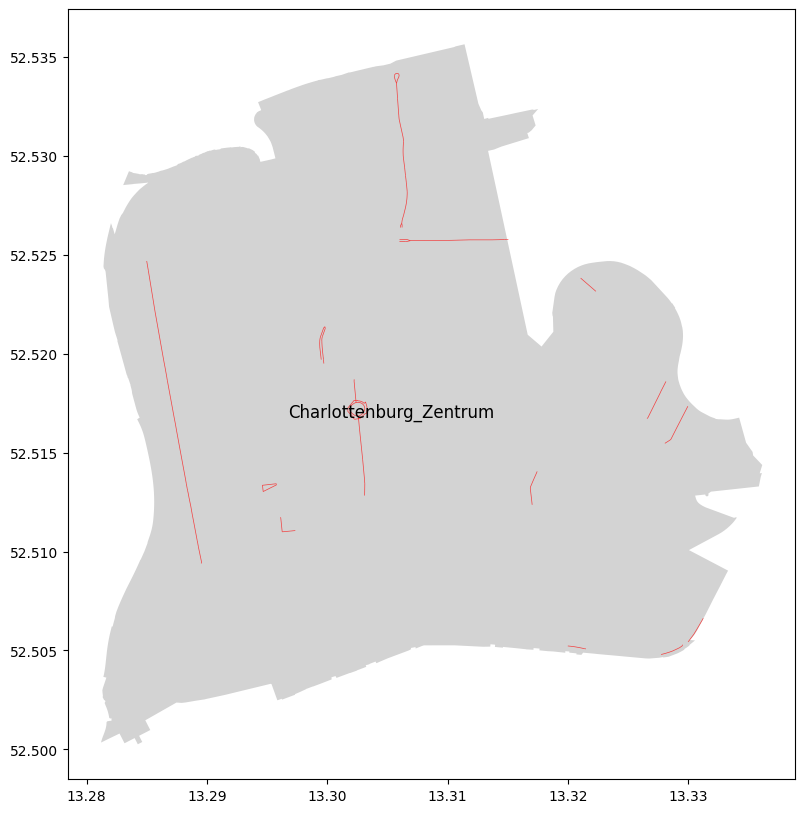

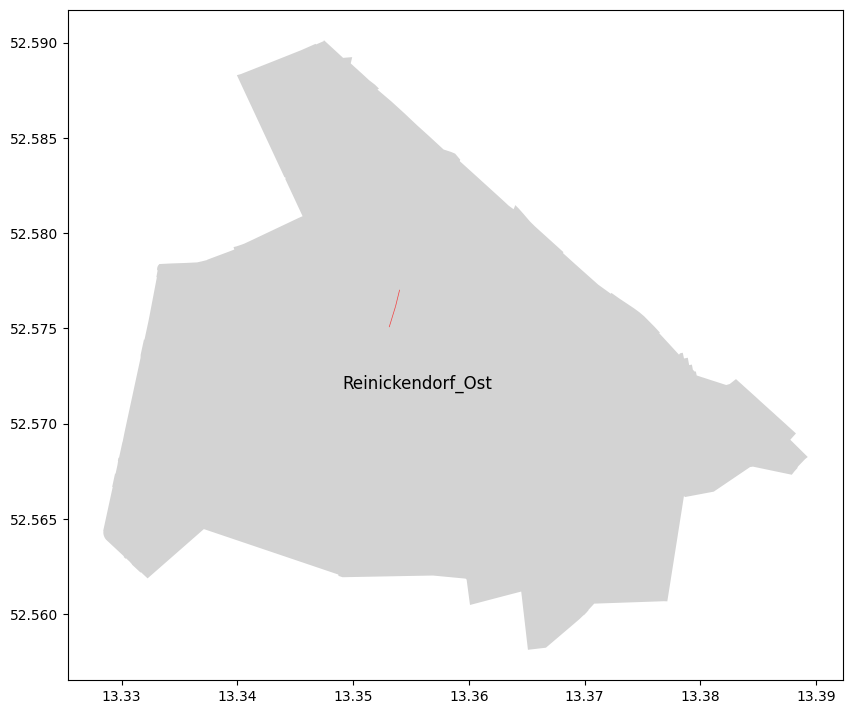

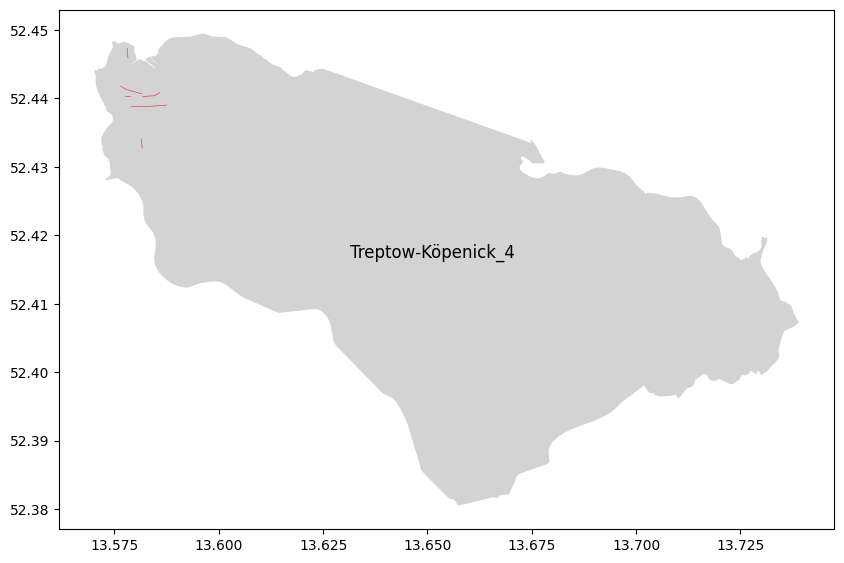

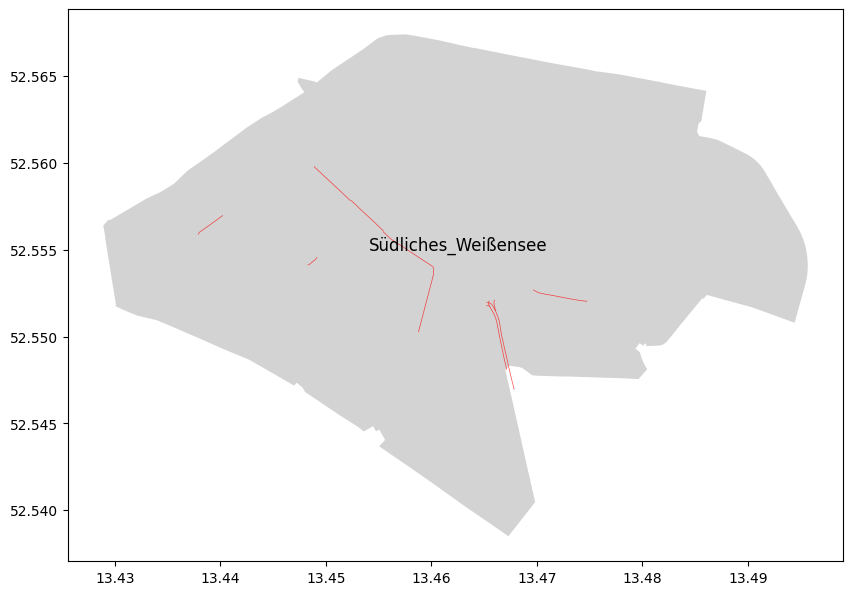

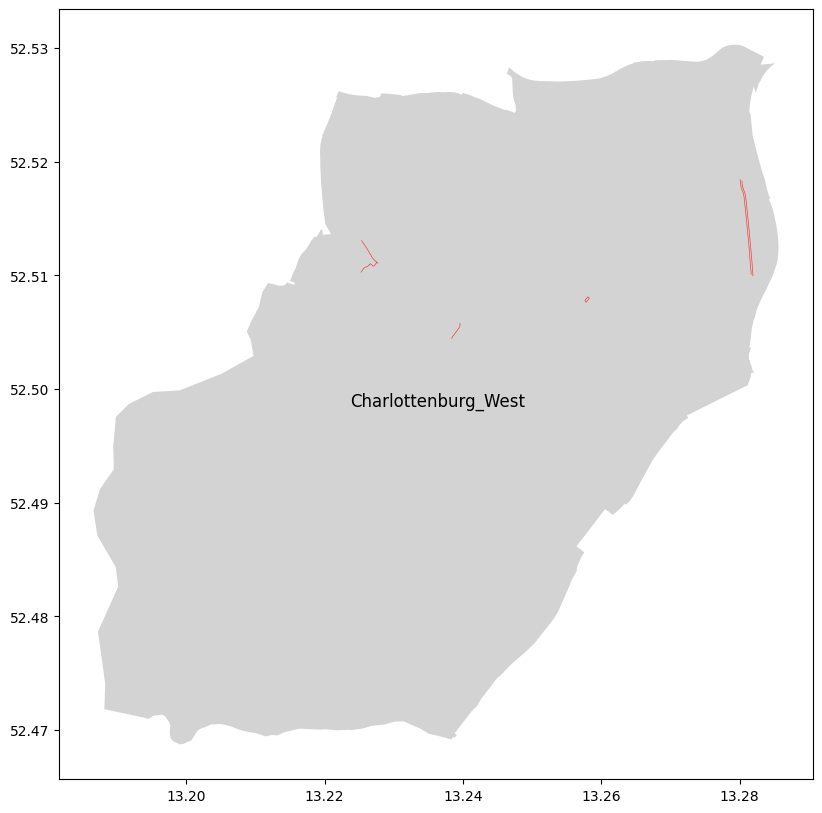

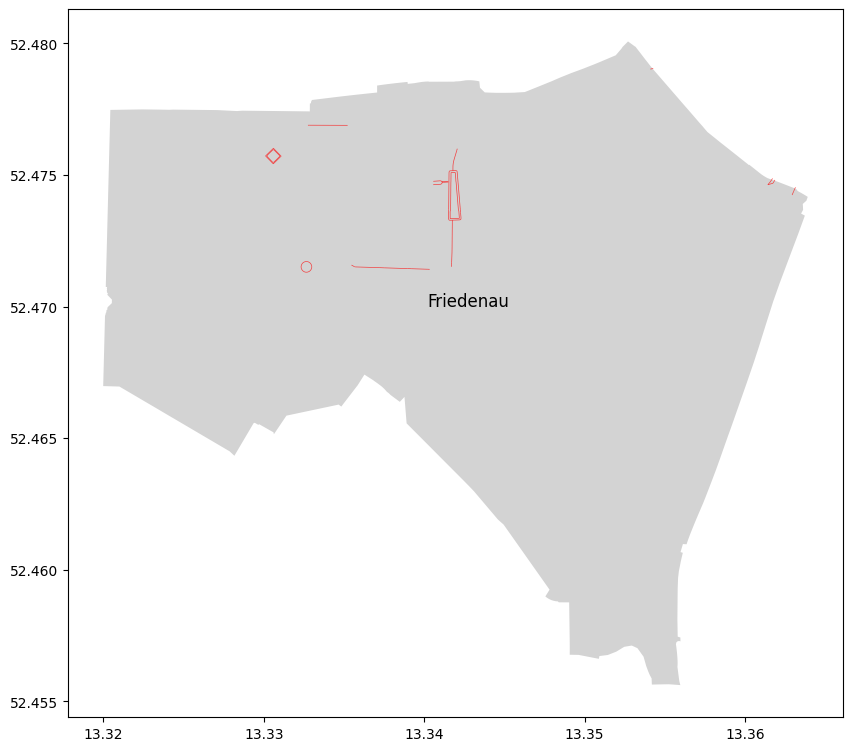

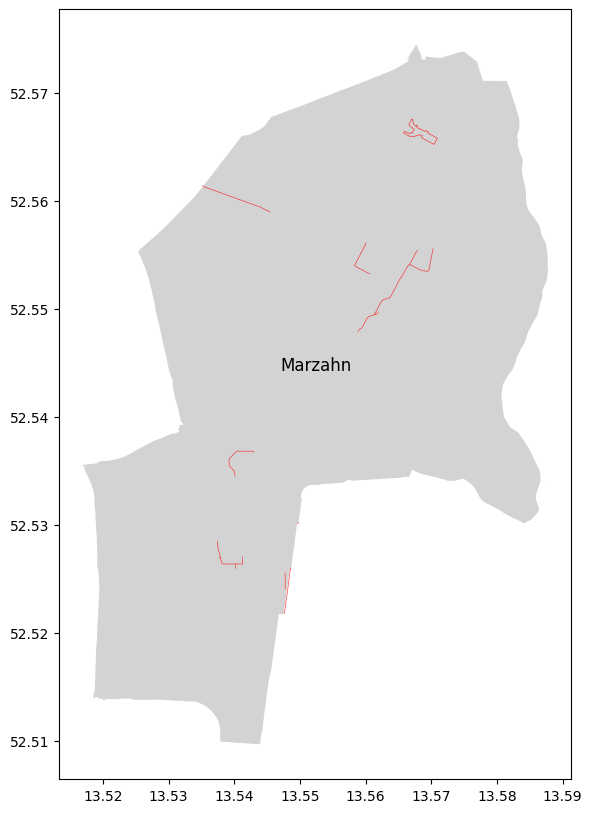

In [34]:
result = admin_areas.apply(
    lambda row: create_fStreetsGeom(row, gdf_streetNames_fm), axis=1
)

In [37]:
def create_berlin_fStreets_geom(admin_areas, gdf_streetNames_fm):
   
    #all admin areas united
    berlin_geometry = admin_areas.unary_union

    #check validity
    if berlin_geometry is None or berlin_geometry.is_empty:
        print("Invalid Berlin geometry.")
        return

    #filter female street names
    gdf_fStreets = gdf_streetNames_fm[gdf_streetNames_fm["gender"] == "F"]
    gdf_mStreets = gdf_streetNames_fm[gdf_streetNames_fm["gender"] == "M"]

    #intersections
    intersections_fStreets = gdf_fStreets[gdf_fStreets.intersects(berlin_geometry)]
    intersections_mStreets = gdf_mStreets[gdf_mStreets.intersects(berlin_geometry)]

    #GeoDataFrame
    gdf_intersections_fStreets = gpd.GeoDataFrame(geometry=intersections_fStreets.geometry, crs=gdf_streetNames_fm.crs)
    gdf_intersections_mStreets = gpd.GeoDataFrame(geometry=intersections_mStreets.geometry, crs=gdf_streetNames_fm.crs)

    #geojson
    gdf_intersections_fStreets.to_file("../maps/geojson/Berlin_femaleStreets.geojson", driver="GeoJSON")
    gdf_intersections_mStreets.to_file("../maps/geojson/Berlin_maleStreets.geojson", driver="GeoJSON")

    #Plot
    fig, ax = plt.subplots(figsize=(20, 20))
    gpd.GeoDataFrame({"geometry": [berlin_geometry]}, crs=gdf_streetNames_fm.crs).plot(ax=ax, color="lightgrey")
  
    gdf_intersections_mStreets.plot(ax=ax, color="blue", alpha=0.7, edgecolor="black", linewidth=0.5, label="male street names")
    gdf_intersections_fStreets.plot(ax=ax, color="red", alpha=0.7, edgecolor="black", linewidth=0.5, label = "female street names")

/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_53766/713066394.py:4: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  berlin_geometry = admin_areas.unary_union


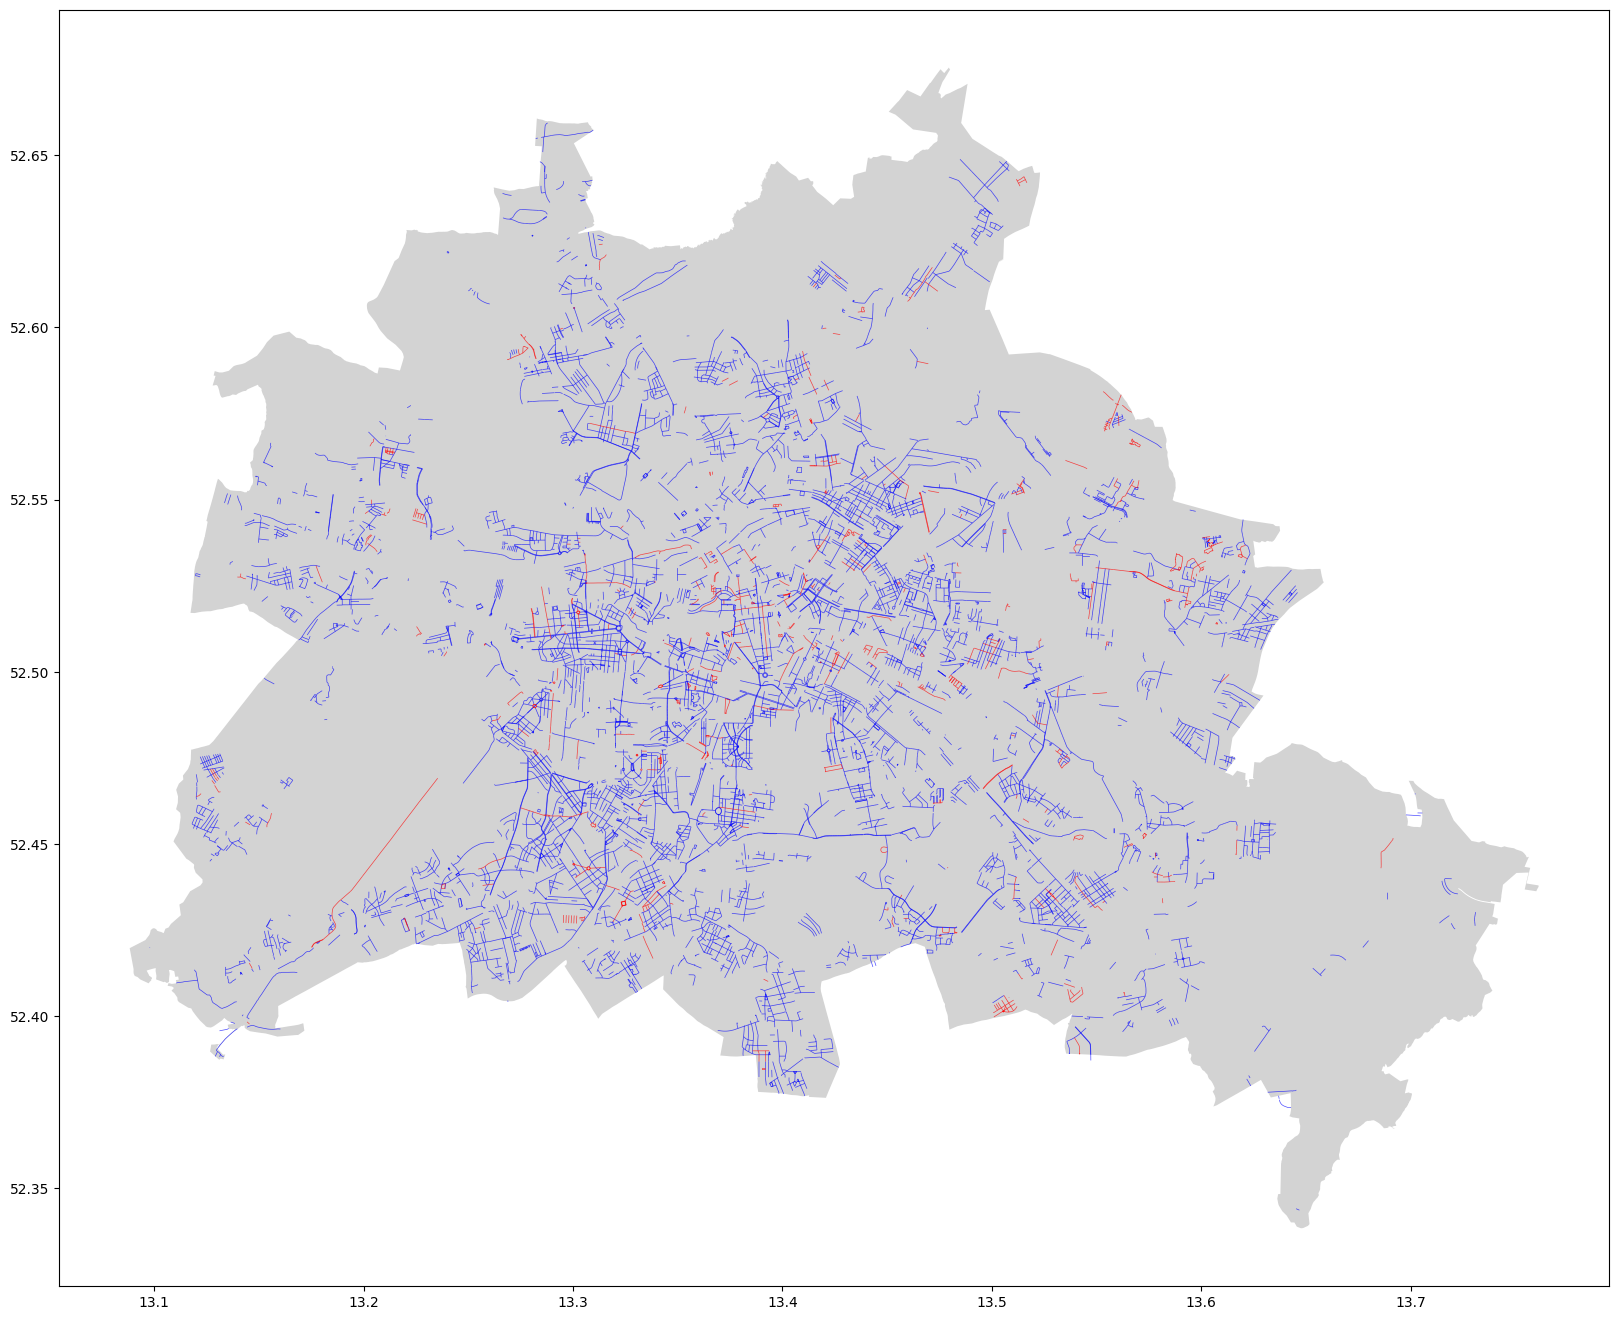

In [38]:
create_berlin_fStreets_geom(admin_areas, gdf_streetNames_fm)